In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/netflix.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
for i in df.columns:
  print(i,':',df[i].nunique())

show_id : 8807
type : 2
title : 8807
director : 4528
cast : 7692
country : 748
date_added : 1767
release_year : 74
rating : 17
duration : 220
listed_in : 514
description : 8775


In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
constraint1=df['director'].apply(lambda x: str(x).split(', ')).tolist()
df_new1=pd.DataFrame(constraint1,index=df['title'])
df_new1=df_new1.stack()
df_new1=pd.DataFrame(df_new1.reset_index())
df_new1.rename(columns={0:'Directors'},inplace=True)
df_new1.drop(['level_1'],axis=1,inplace=True)
df_new1.head()

,title,Directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


In [ ]:
constraint2=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df_new2=pd.DataFrame(constraint2,index=df['title'])
df_new2=df_new2.stack()
df_new2=pd.DataFrame(df_new2.reset_index())
df_new2.rename(columns={0:'Actors'},inplace=True)
df_new2.drop(['level_1'],axis=1,inplace=True)
df_new2.head()

,title,Actors
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [ ]:
constraint3=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_new3=pd.DataFrame(constraint3,index=df['title'])
df_new3=df_new3.stack()
df_new3=pd.DataFrame(df_new3.reset_index())
df_new3.rename(columns={0:'Genre'},inplace=True)
df_new3.drop(['level_1'],axis=1,inplace=True)
df_new3.head()

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [ ]:
constraint4=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df_new4=pd.DataFrame(constraint4,index=df['title'])
df_new4=df_new4.stack()
df_new4=pd.DataFrame(df_new4.reset_index())
df_new4.rename(columns={0:'country'},inplace=True)
df_new4.drop(['level_1'],axis=1,inplace=True)
df_new4.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


In [ ]:
df_new=pd.merge(df_new1,df_new2,on='title')
df_new=pd.merge(df_new,df_new3,on='title')
df_new=pd.merge(df_new,df_new4,on='title')
df_new['Directors'] = df_new['Directors'].replace('nan','Unknown Director')
df_new['Actors'] = df_new['Actors'].replace('nan','Unknown Actor')
df_new.head()

,title,Directors,Actors,Genre,country
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa


In [ ]:
df_final=df_new.merge(df[['show_id', 'type', 'title', 'date_added',
       'release_year', 'rating', 'duration']],on=['title'],how='left')
df_final.head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [ ]:
df_final.loc[df_final['duration'].isnull(),'duration']=df_final.loc[df_final['duration'].isnull(),'duration'].fillna(df_final['rating'])
df_final.loc[df_final['rating'].str.contains('min', na=False),'rating']='NR'
df_final['rating'].fillna('NR',inplace=True)
df_final.isnull().sum()

title             0
Directors         0
Actors            0
Genre             0
country           0
show_id           0
type              0
date_added      158
release_year      0
rating            0
duration          0
dtype: int64

In [ ]:
for i in df_final[df_final['date_added'].isnull()]['release_year'].unique():
  imp=df_final[df_final['release_year']==i]['date_added'].mode().values[0]
  df_final.loc[df_final['release_year']==i,'date_added']=df_final.loc[df_final['release_year']==i,'date_added'].fillna(imp)
df_final.isnull().sum()

title           0
Directors       0
Actors          0
Genre           0
country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [ ]:
for i in df_final[df_final['country'].isnull()]['Directors'].unique():
  if i in df_final[~df_final['country'].isnull()]['Directors'].unique():
    imp=df_final[df_final['Directors']==i]['country'].mode().values[0]
    df_final.loc[df_final['Directors']==i,'country']=df_final.loc[df_final['Directors']==i,'country'].fillna(imp)

In [ ]:
for i in df_final[df_final['country'].isnull()]['Actors'].unique():
  if i in df_final[~df_final['country'].isnull()]['Actors'].unique():
    imp=df_final[df_final['Actors']==i]['country'].mode().values[0]
    df_final.loc[df_final['Actors']==i,'country']=df_final.loc[df_final['Actors']==i,'country'].fillna(imp)
df_final['country'].fillna('Unknown Country',inplace=True)
df_final.isnull().sum()

title           0
Directors       0
Actors          0
Genre           0
country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [ ]:
df_final['duration']=df_final['duration'].str.replace(" min","")
df_final['duration'].unique()

array(['90', '2 Seasons', '1 Season', '91', '125', '9 Seasons', '104',
       '127', '4 Seasons', '67', '94', '5 Seasons', '161', '61', '166',
       '147', '103', '97', '106', '111', '3 Seasons', '110', '105', '96',
       '124', '116', '98', '23', '115', '122', '99', '88', '100',
       '6 Seasons', '102', '93', '95', '85', '83', '113', '13', '182',
       '48', '145', '87', '92', '80', '117', '128', '119', '143', '114',
       '118', '108', '63', '121', '142', '154', '120', '82', '109', '101',
       '86', '229', '76', '89', '156', '112', '107', '129', '135', '136',
       '165', '150', '133', '70', '84', '140', '78', '7 Seasons', '64',
       '59', '139', '69', '148', '189', '141', '130', '138', '81', '132',
       '10 Seasons', '123', '65', '68', '66', '62', '74', '131', '39',
       '46', '38', '8 Seasons', '17 Seasons', '126', '155', '159', '137',
       '12', '273', '36', '34', '77', '60', '49', '58', '72', '204',
       '212', '25', '73', '29', '47', '32', '35', '71', '149', '

In [ ]:
df_final['duration_copy']=df_final['duration'].copy()
df_final1=df_final.copy()
df_final1.loc[df_final1['duration_copy'].str.contains('Season'),'duration_copy']=0
df_final1['duration_copy']=df_final1['duration_copy'].astype('int')
df_final1.head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0


In [ ]:
df_final1['duration_copy'].describe()

count    201991.000000
mean         77.152789
std          52.269154
min           0.000000
25%           0.000000
50%          95.000000
75%         112.000000
max         312.000000
Name: duration_copy, dtype: float64

In [ ]:
bins1 = [-1,1,50,80,100,120,150,200,315]
labels1 = ['<1','1-50','50-80','80-100','100-120','120-150','150-200','200-315']
df_final1['duration_copy'] = pd.cut(df_final1['duration_copy'],bins=bins1,labels=labels1)
df_final1.head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,80-100
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1


In [ ]:
df_final1.loc[~df_final1['duration'].str.contains('Season'),'duration']=df_final1.loc[~df_final1['duration'].str.contains('Season'),'duration_copy']
df_final1.drop(['duration_copy'],axis=1,inplace=True)
df_final1.head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [ ]:
from datetime import datetime
from dateutil.parser import parse
arr=[]
for i in df_final1['date_added'].values:
  dt1=parse(i)
  arr.append(dt1.strftime('%Y-%m-%d'))
df_final1['Modified_Added_date'] =arr
df_final1['Modified_Added_date']=pd.to_datetime(df_final1['Modified_Added_date'])
df_final1['month_added']=df_final1['Modified_Added_date'].dt.month
df_final1['week_Added']=df_final1['Modified_Added_date'].dt.strftime('%U')
df_final1['year']=df_final1['Modified_Added_date'].dt.year
df_final1.head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,38,2021
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021


In [ ]:
df_final1['title']=df_final1['title'].str.replace(r"\(.*\)","")
df_final1.head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,38,2021
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021


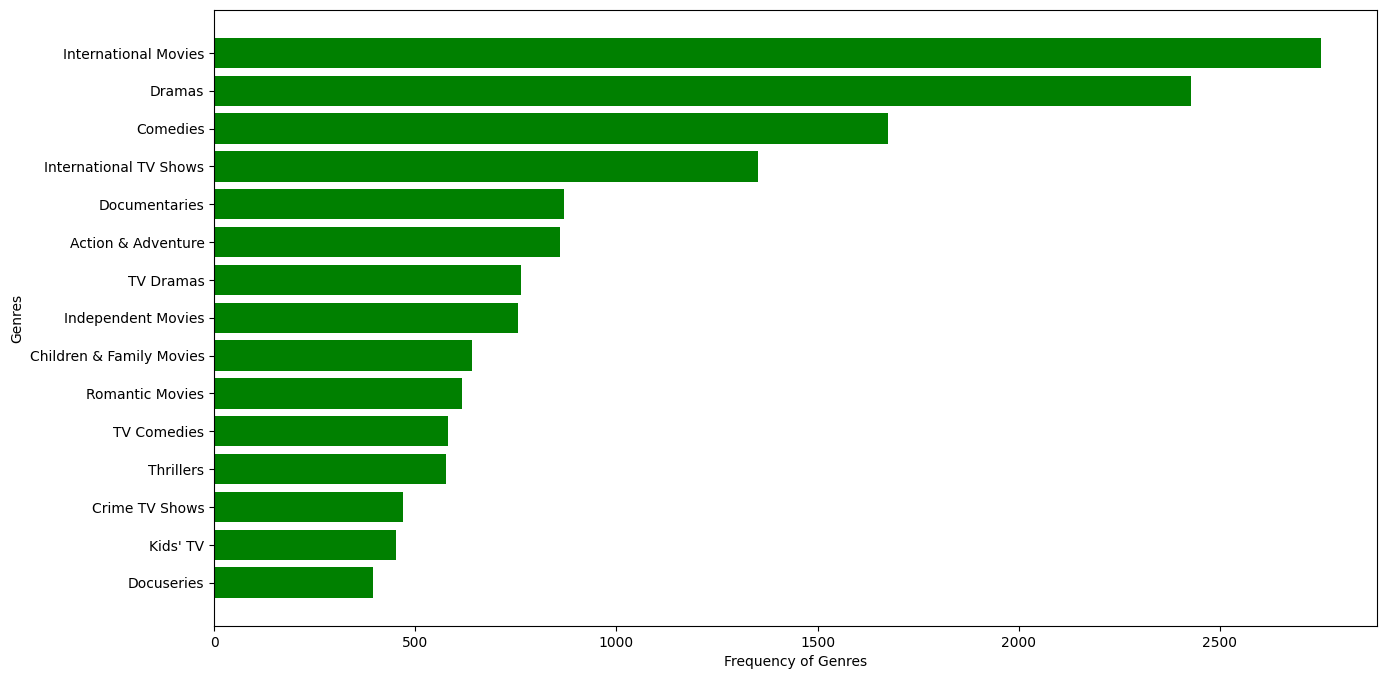

In [ ]:
df_genre=df_final1.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['green'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

International Movies, Dramas and Comedies are the most popular .

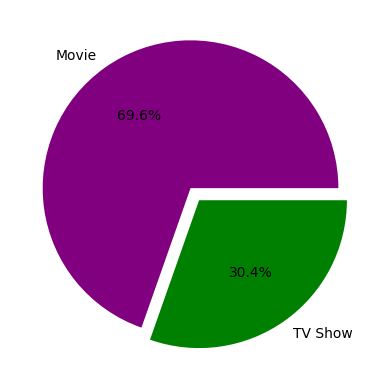

In [ ]:
df_final1.groupby(['type']).agg({"title":"nunique"})
df_type=df_final1.groupby(['type']).agg({"title":"nunique"}).reset_index()
plt.pie(df_type['title'],explode=(0.05,0.05), labels=df_type['type'],colors=['purple','green'],autopct='%.1f%%')
plt.show()

We have 70:30 ratio of Movies and TV Shows in our data


In [ ]:
df_final1['country'] = df_final1['country'].str.replace(',', '')
df_final1.head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,38,2021
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021


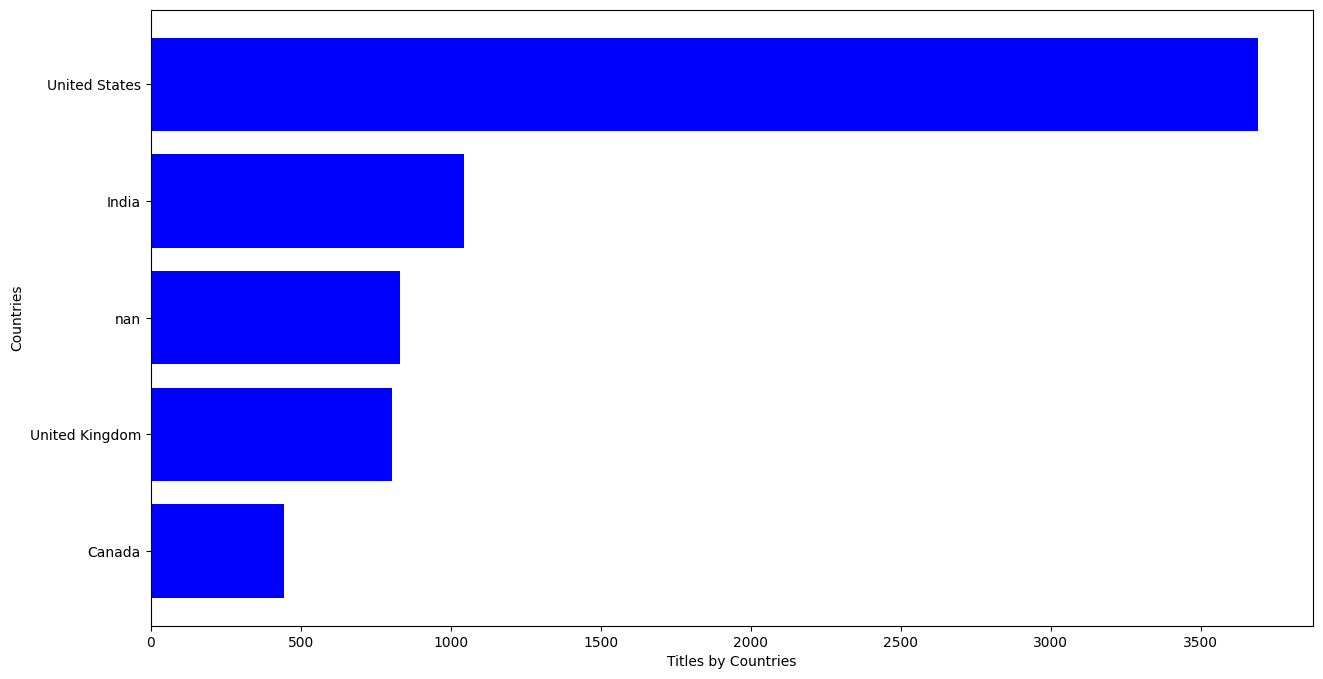

In [ ]:
df_country=df_final1.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:5]
plt.figure(figsize=(15,8))
plt.barh(df_country[::-1]['country'], df_country[::-1]['title'],color=['blue'])
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
plt.show()

US,India,UK,Canada and France are leading countries in Content Creation on Netflix


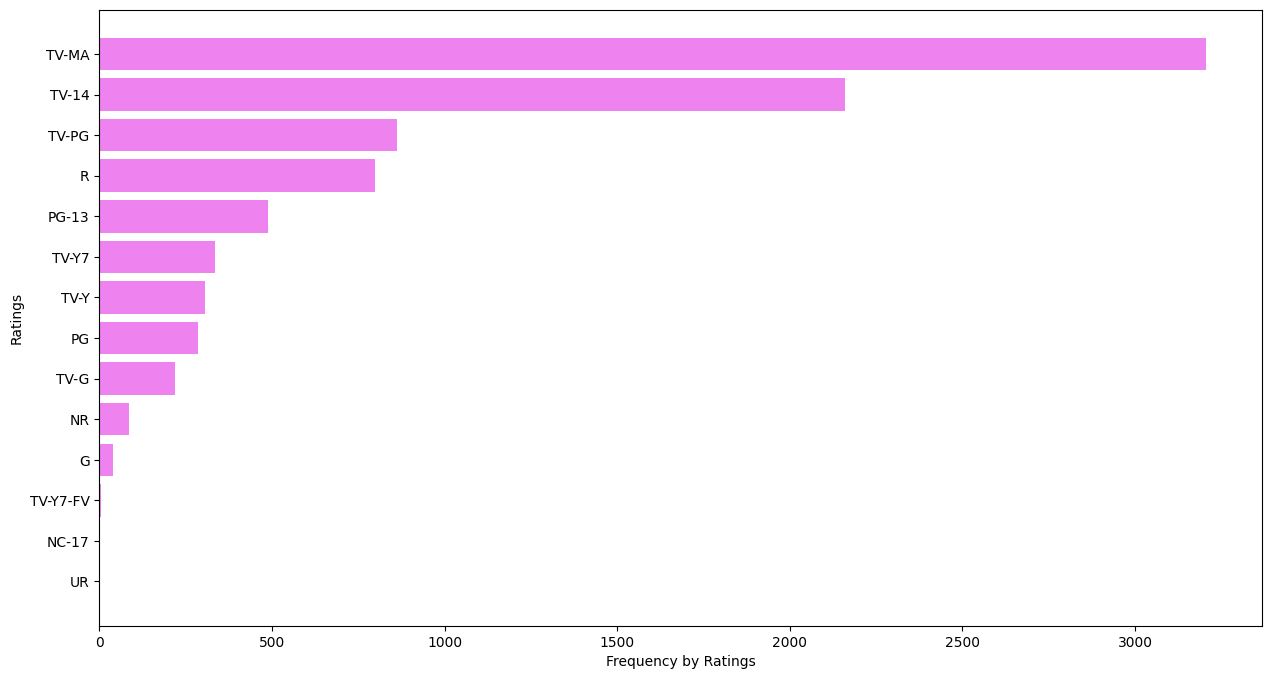

In [ ]:
df_rating=df_final1.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

Most of the highly rated content on Netflix is intended for Mature Audiences, R Rated, content not intended for audience under 14 and those which require Parental Guidance

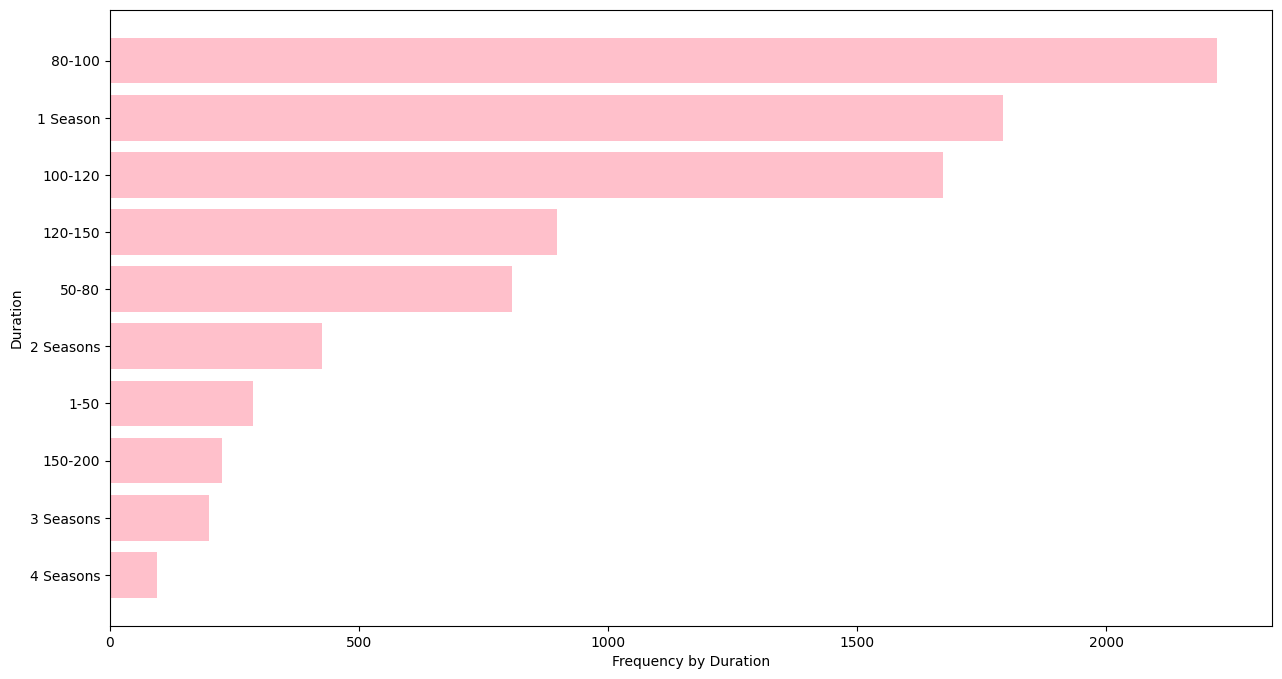

In [ ]:
df_duration=df_final1.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

The duration of Most Watched content in our whole data is 80-100 mins.These must be movies and Shows having only 1 Season.


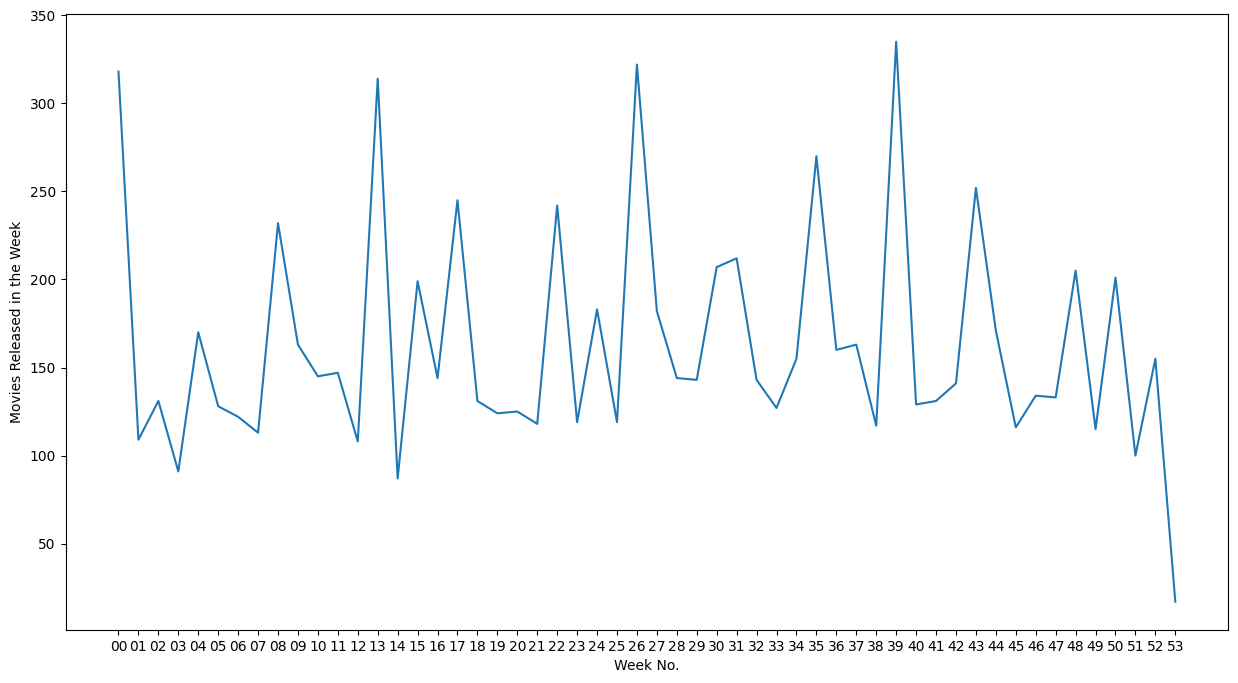

In [ ]:
df_week=df_final1.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

Most of the Content across Netflix is added in the first week of the year and it follows a bit of a cyclical pattern

1) So this time, the granularity level is country and analysis of TV Shows/Movies the country brings. I am going to consider only the top countries individually for TV Shows and Movies. There are definitely some common countries too which bring out quality content in both TV Shows and Movies.

2) Which Genres do these countries offer and what are the intended audiences(Ratings) which are popular in Netflix?

3)In case of Movies, what is the duration/length of movies which makes them special and depicts attention span?

4)Who are the popular actors/directors across TV Shows and Movies in these countries?

5)In what time of the year, people tend to watch movies and shows in these countries?

6)Popular Actor and Director Combinations in these countries

In [ ]:
df_usa_shows=df_final1[df_final1['country']=='United States'][df_final1[df_final1['country']=='United States']['type']=='TV Show']
df_usa_movies=df_final1[df_final1['country']=='United States'][df_final1[df_final1['country']=='United States']['type']=='Movie']

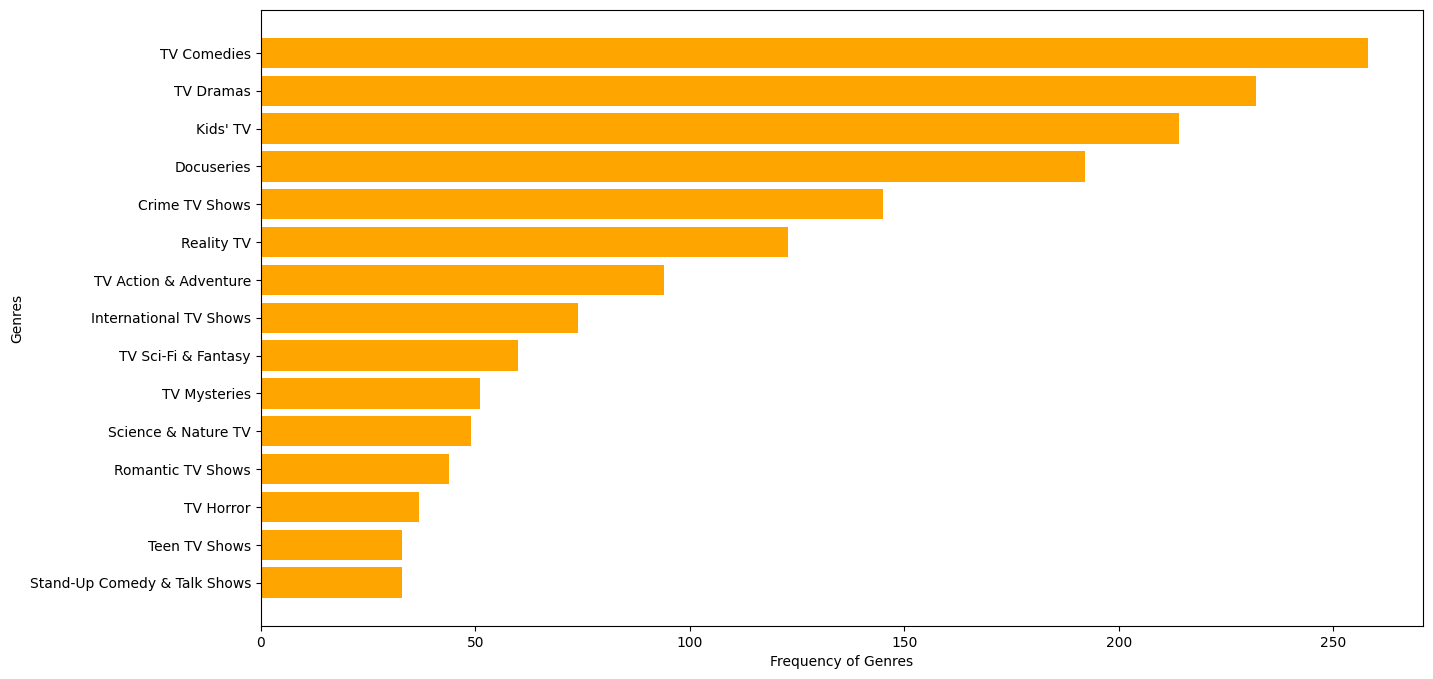

In [ ]:
df_genre=df_usa_shows.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

Dramas,Comedy, Kids 'TV Shows, International TV Shows and Docuseries, Genres are popular in TV Series in USA

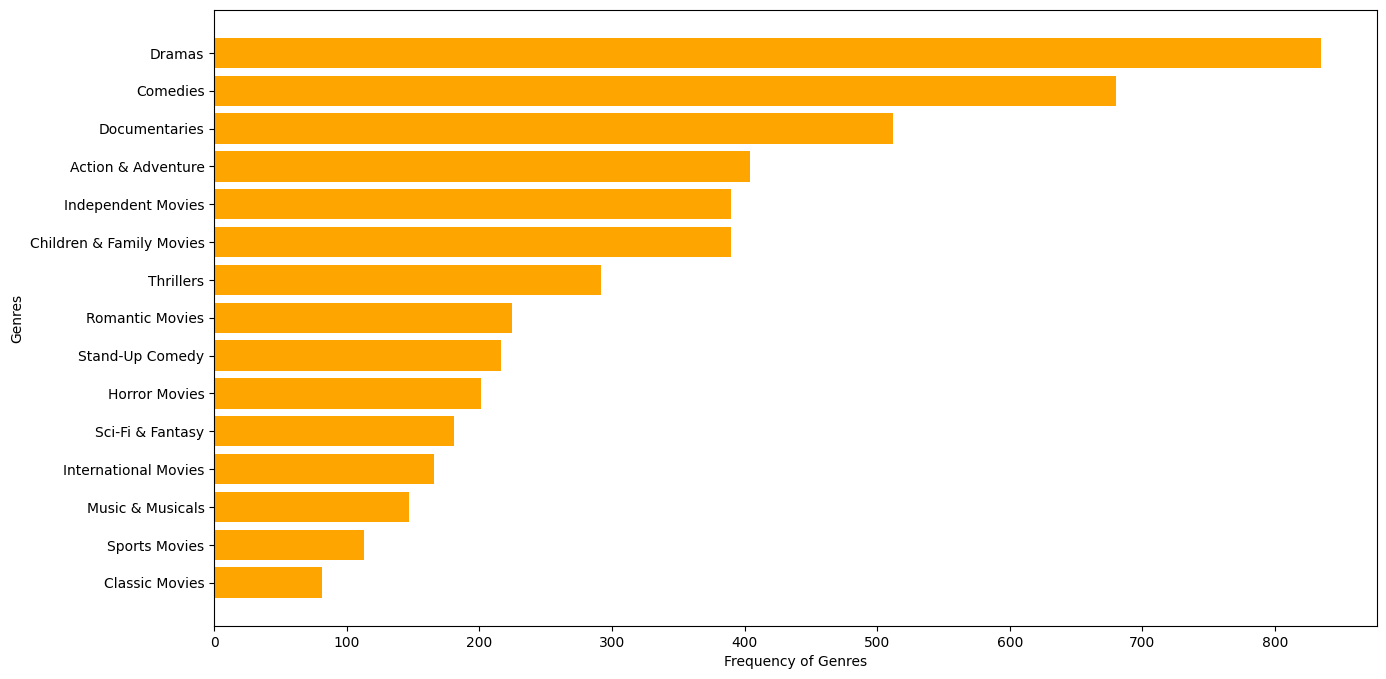

In [ ]:
df_genre=df_usa_movies.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

Dramas,Comedy, Documentaries, Family Movies and Action Genres in Movies are popular in USA

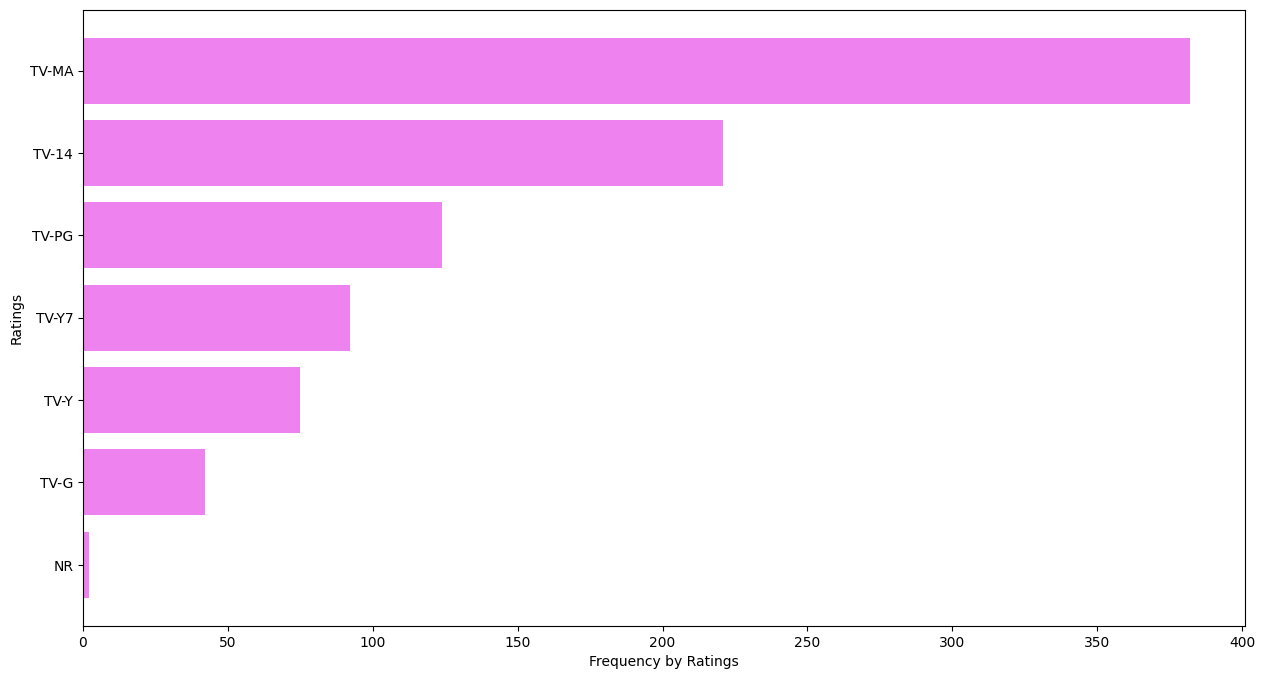

In [ ]:
df_rating=df_usa_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

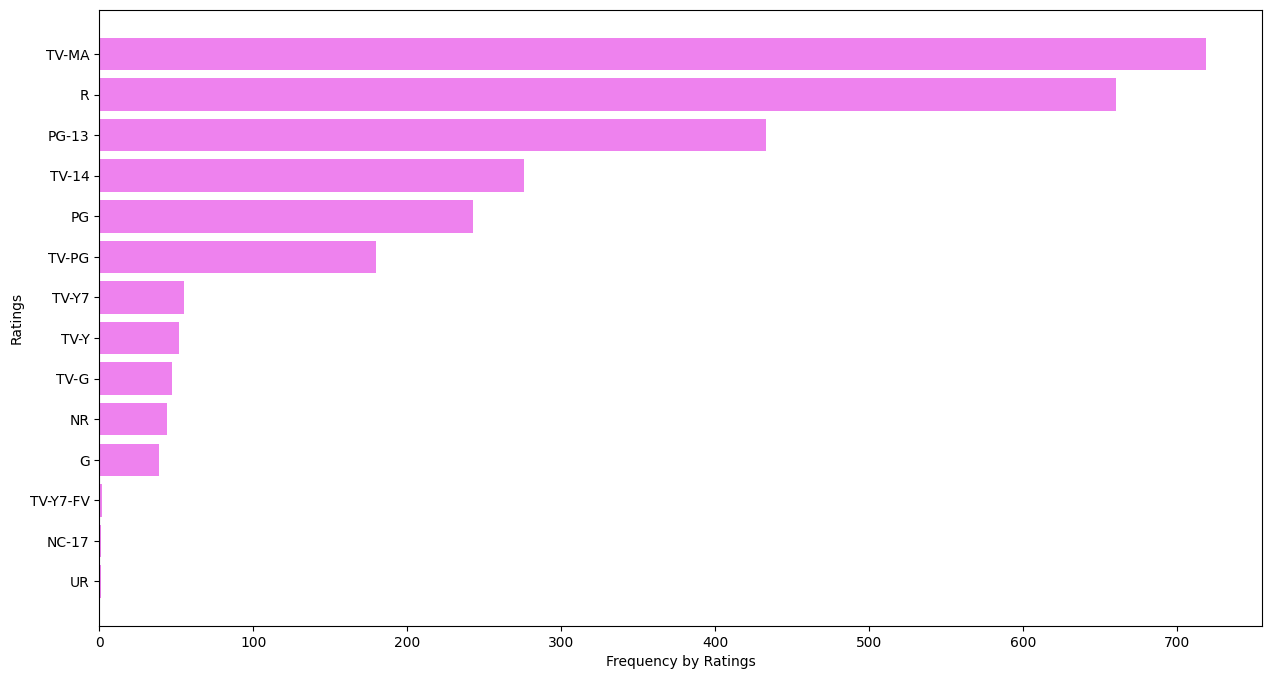

In [ ]:
df_rating=df_usa_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

So it seems plaussible to conclude that the popular ratings across Netflix includes Mature Audiences and those appropriate for over 14/over 17 ages in both Movies and TV Shows in USA

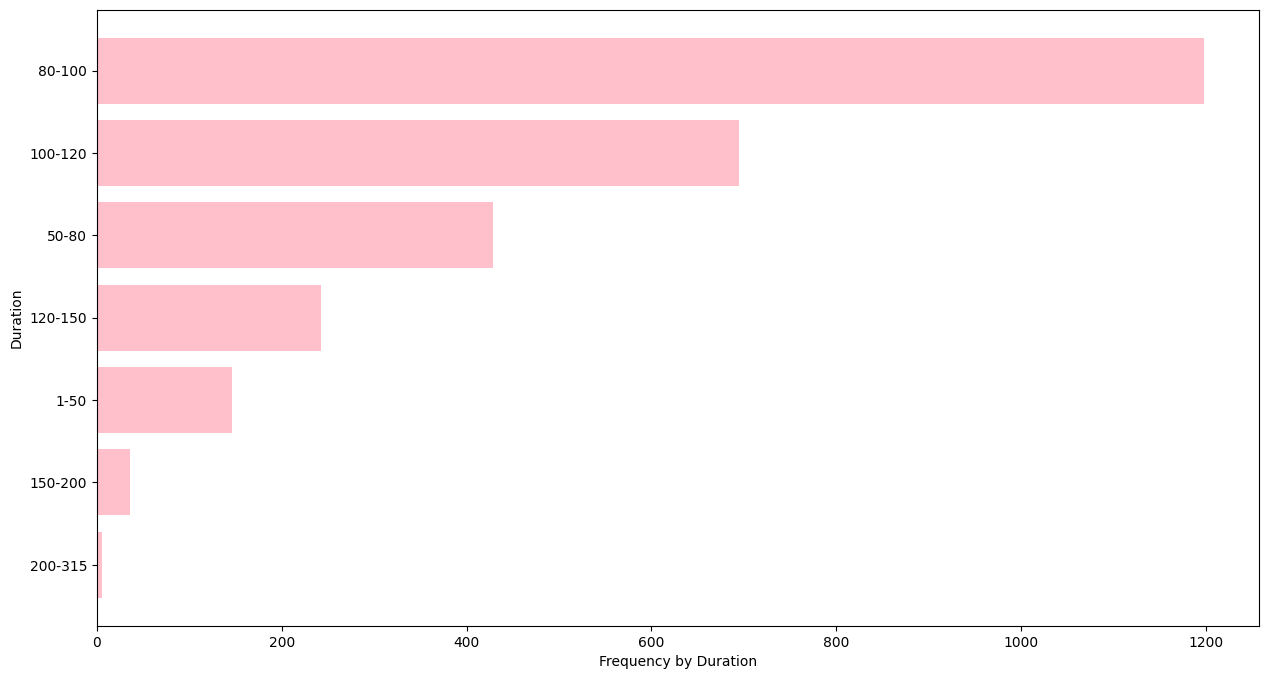

In [ ]:
df_duration=df_usa_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

Across movies 80-100,100-120 is the ranges of minutes for which most movies lie. So quite possibly 80-120 mins is the sweet spot we would be wanting for movies in USA

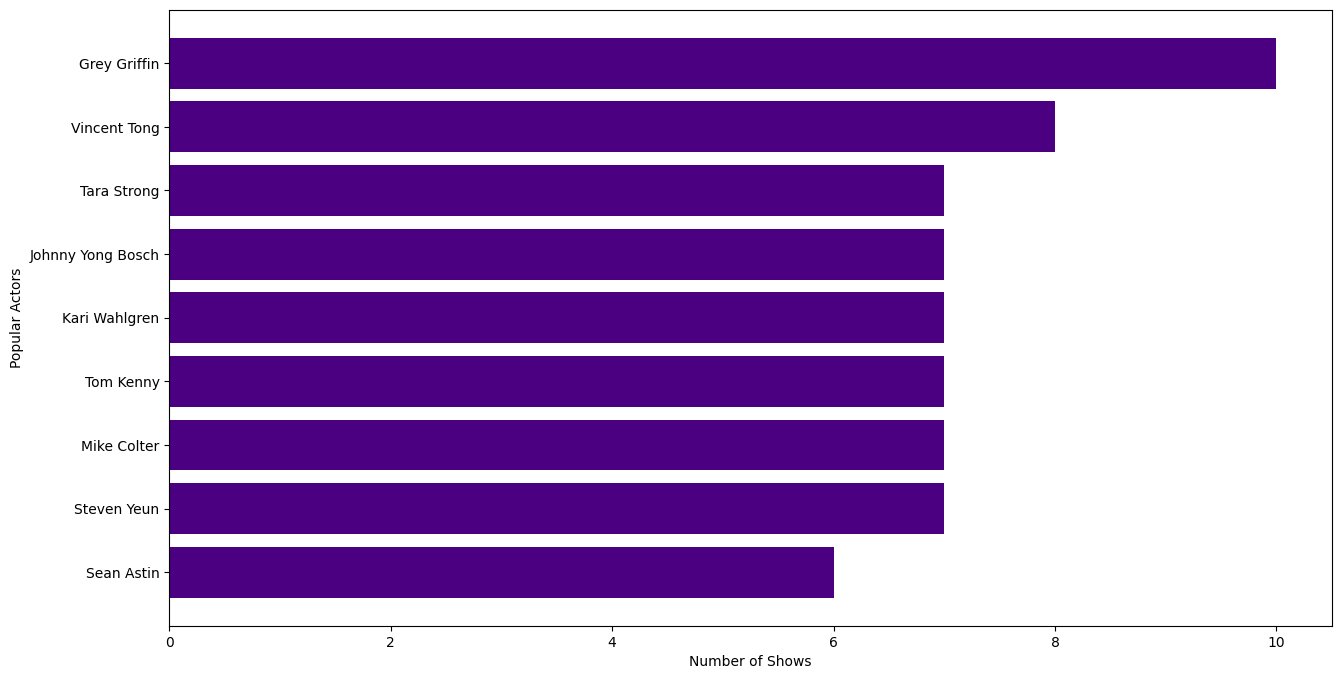

In [ ]:
df_actors=df_usa_shows.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors=df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actors')
plt.show()

Vincent Tong,Grey Griffin and Tara Strong are the most popular actors across TV Shows in USA

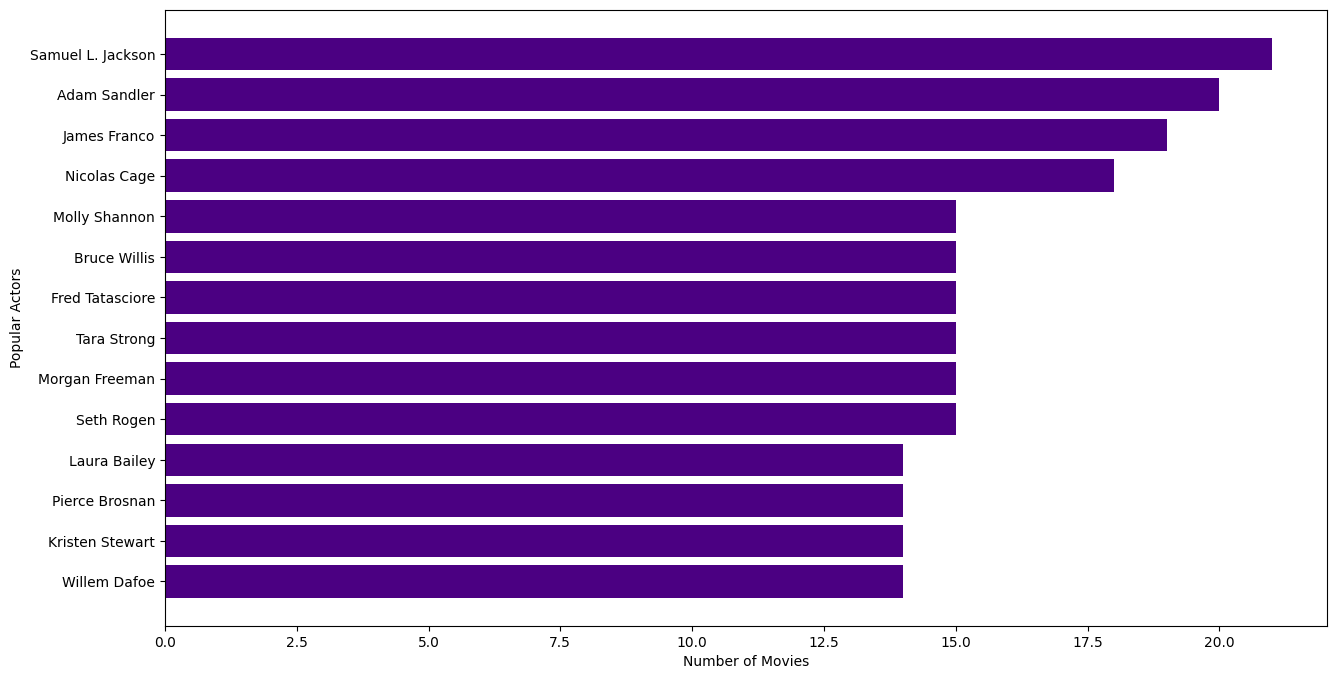

In [ ]:
df_actors=df_usa_movies.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_actors=df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

Samuel Jackson,Adam Sandler,James Franco and Nicolas Cage are very much popular across movies on Netflix in USA

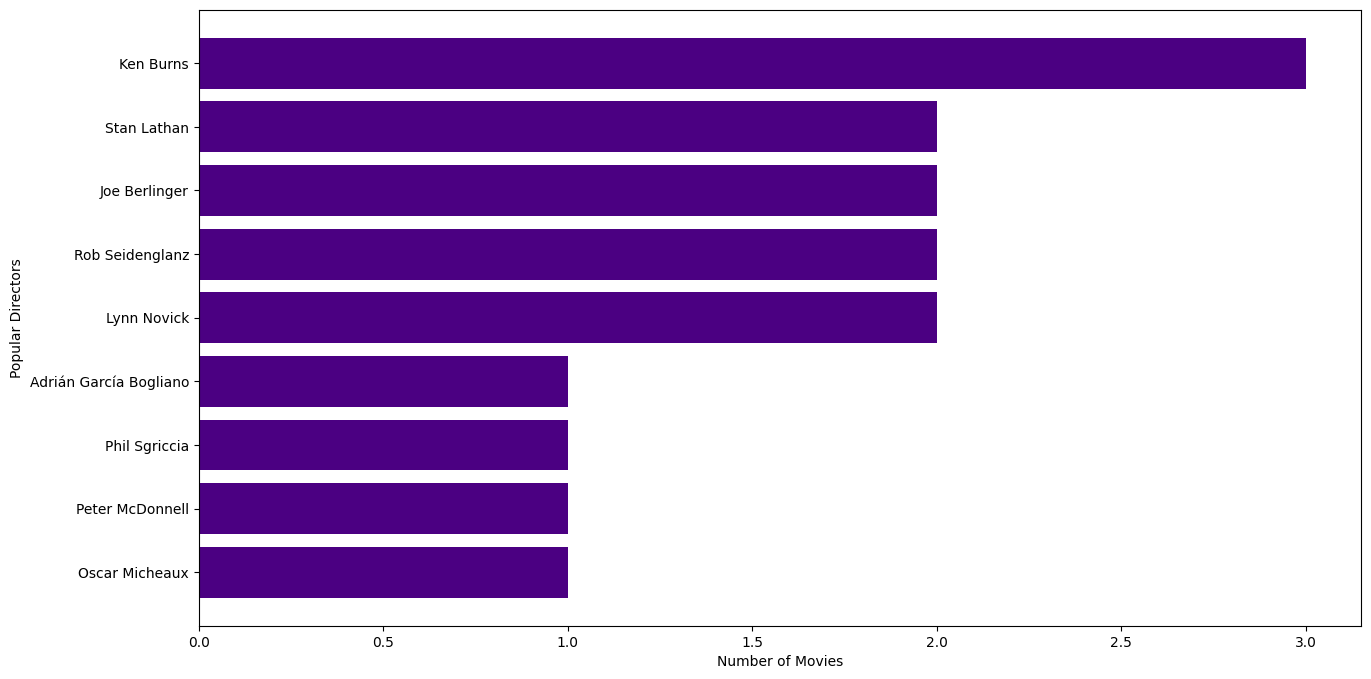

In [ ]:
df_directors=df_usa_shows.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_directors=df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

Ken Burns,Stan Lathan, Joe Barlinger are popular directors across TV Shows on Netflix in USA

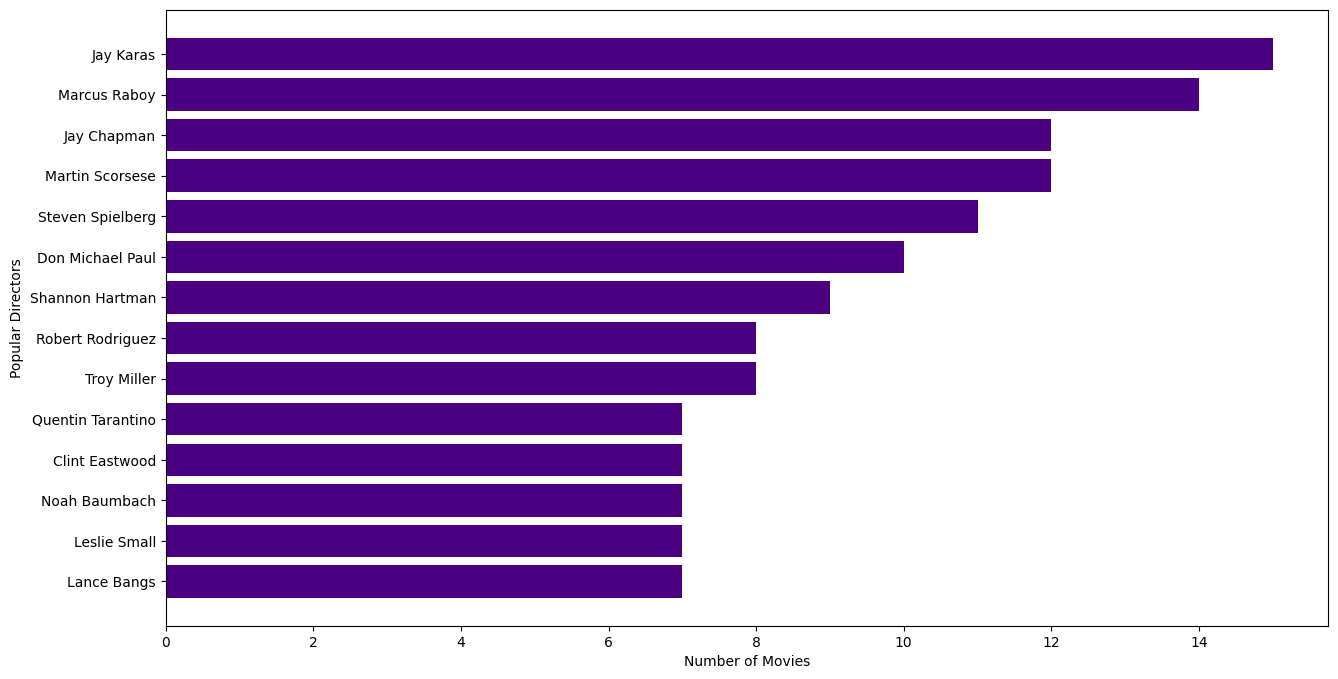

In [ ]:
df_directors=df_usa_movies.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_directors=df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

Jay Karas,Marcus Raboy,Martin Scorcese and Jay Chapman are popular directors across movies in USA

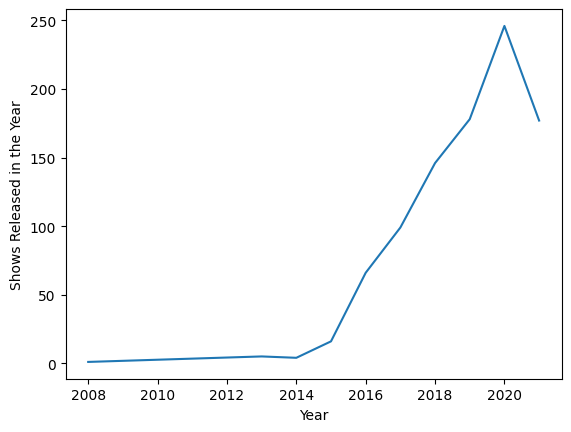

In [ ]:
df_year=df_usa_shows.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()

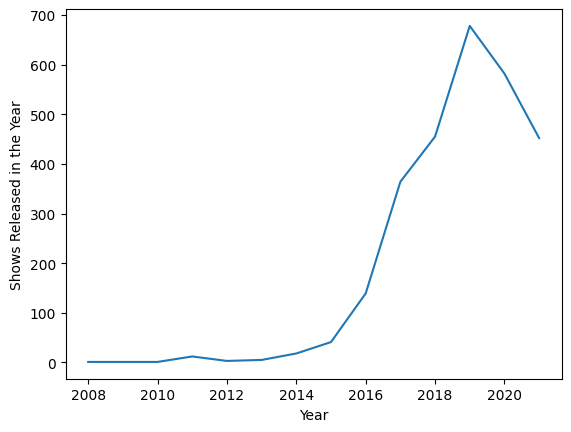

In [ ]:
df_year=df_usa_movies.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()

In USA, number of shows remained the same in 2021 as they were in 2020 while number of movies declined:

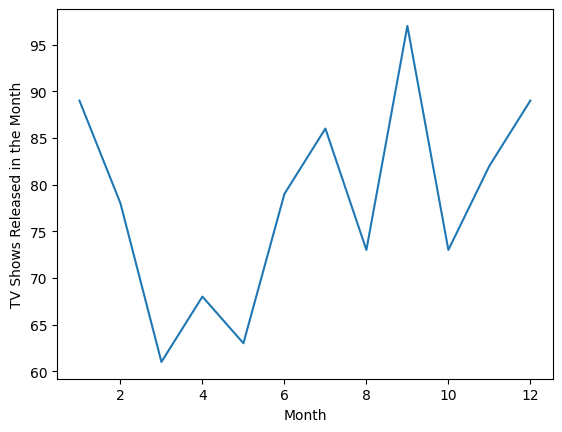

In [ ]:
df_month=df_usa_shows.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("TV Shows Released in the Month")
plt.xlabel("Month")
plt.show()

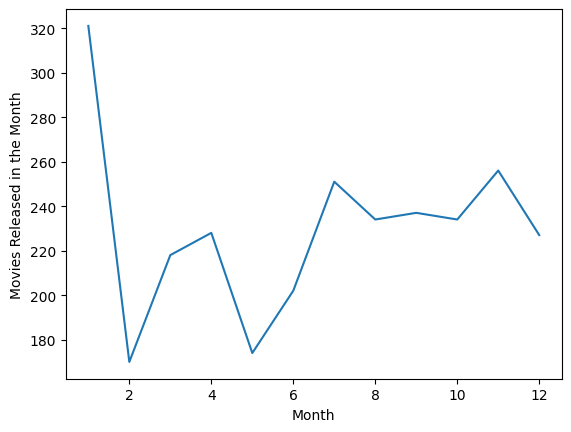

In [ ]:
df_month=df_usa_movies.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

TV Shows are added in Netflix by a tremendous amount in July and September in USA

Movies are added in Netflix in USA by a tremendous amount in first week/last month of current year and first month of next year

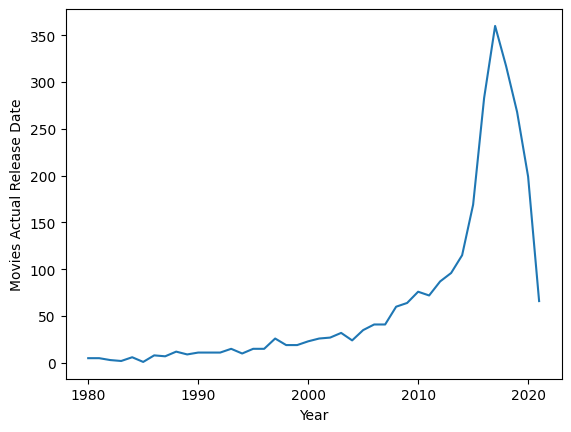

In [ ]:
df_release_year=df_usa_movies[df_usa_movies['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

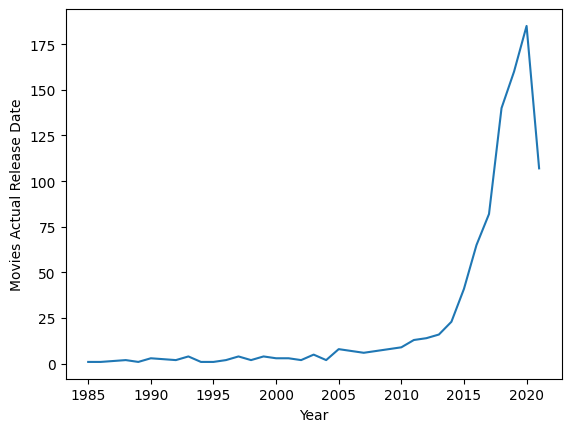

In [ ]:
df_release_year=df_usa_shows[df_usa_shows['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

In USA, though both Movies and Shows have reduced in 2021, the amount of decrease in number of TV Shows is small as compared to Movies

In [ ]:
df_usa_movies['Actor_Director_Combination'] = df_usa_movies.Actors.str.cat(df_usa_movies.Directors, sep=' and ')
df_usa_movies_subset=df_usa_movies[df_usa_movies['Actors']!='Unknown Actor']
df_usa_movies_subset=df_usa_movies_subset[df_usa_movies_subset['Directors']!='Unknown Director']
df_usa_movies_subset.head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year,Actor_Director_Combination
179,Sankofa,Haile Gerima,Kofi Ghanaba,Dramas,United States,s8,Movie,"September 24, 2021",1993,TV-MA,120-150,2021-09-24,9,38,2021,Kofi Ghanaba and Haile Gerima
185,Sankofa,Haile Gerima,Kofi Ghanaba,Independent Movies,United States,s8,Movie,"September 24, 2021",1993,TV-MA,120-150,2021-09-24,9,38,2021,Kofi Ghanaba and Haile Gerima
191,Sankofa,Haile Gerima,Kofi Ghanaba,International Movies,United States,s8,Movie,"September 24, 2021",1993,TV-MA,120-150,2021-09-24,9,38,2021,Kofi Ghanaba and Haile Gerima
197,Sankofa,Haile Gerima,Oyafunmike Ogunlano,Dramas,United States,s8,Movie,"September 24, 2021",1993,TV-MA,120-150,2021-09-24,9,38,2021,Oyafunmike Ogunlano and Haile Gerima
203,Sankofa,Haile Gerima,Oyafunmike Ogunlano,Independent Movies,United States,s8,Movie,"September 24, 2021",1993,TV-MA,120-150,2021-09-24,9,38,2021,Oyafunmike Ogunlano and Haile Gerima


In [ ]:
df_usa_shows['Actor_Director_Combination'] = df_usa_shows.Actors.str.cat(df_usa_shows.Directors, sep=' and ')
df_usa_shows_subset=df_usa_shows[df_usa_shows['Actors']!='Unknown Actor']
df_usa_shows_subset=df_usa_shows_subset[df_usa_shows_subset['Directors']!='Unknown Director']
df_usa_shows_subset.head()

,title,Directors,Actors,Genre,country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year,Actor_Director_Combination
9348,The Flash,Glen Winter,Grant Gustin,Crime TV Shows,United States,s381,TV Show,"July 28, 2021",2021,TV-14,7 Seasons,2021-07-28,7,30,2021,Grant Gustin and Glen Winter
9349,The Flash,Glen Winter,Grant Gustin,TV Action & Adventure,United States,s381,TV Show,"July 28, 2021",2021,TV-14,7 Seasons,2021-07-28,7,30,2021,Grant Gustin and Glen Winter
9350,The Flash,Glen Winter,Grant Gustin,TV Sci-Fi & Fantasy,United States,s381,TV Show,"July 28, 2021",2021,TV-14,7 Seasons,2021-07-28,7,30,2021,Grant Gustin and Glen Winter
9351,The Flash,Glen Winter,Candice Patton,Crime TV Shows,United States,s381,TV Show,"July 28, 2021",2021,TV-14,7 Seasons,2021-07-28,7,30,2021,Candice Patton and Glen Winter
9352,The Flash,Glen Winter,Candice Patton,TV Action & Adventure,United States,s381,TV Show,"July 28, 2021",2021,TV-14,7 Seasons,2021-07-28,7,30,2021,Candice Patton and Glen Winter


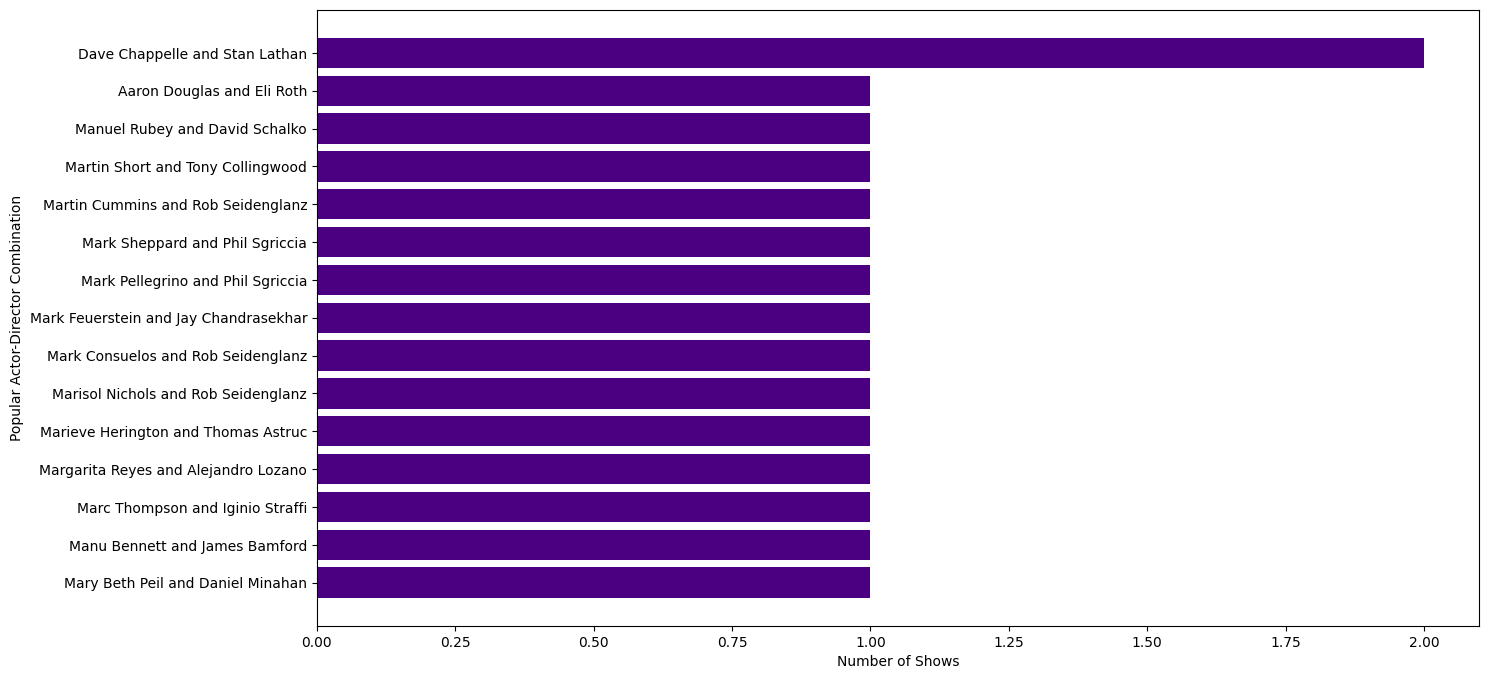

In [ ]:
df_actors_directors=df_usa_shows_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_actors_directors[::-1]['Actor_Director_Combination'], df_actors_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actor-Director Combination')
plt.show()

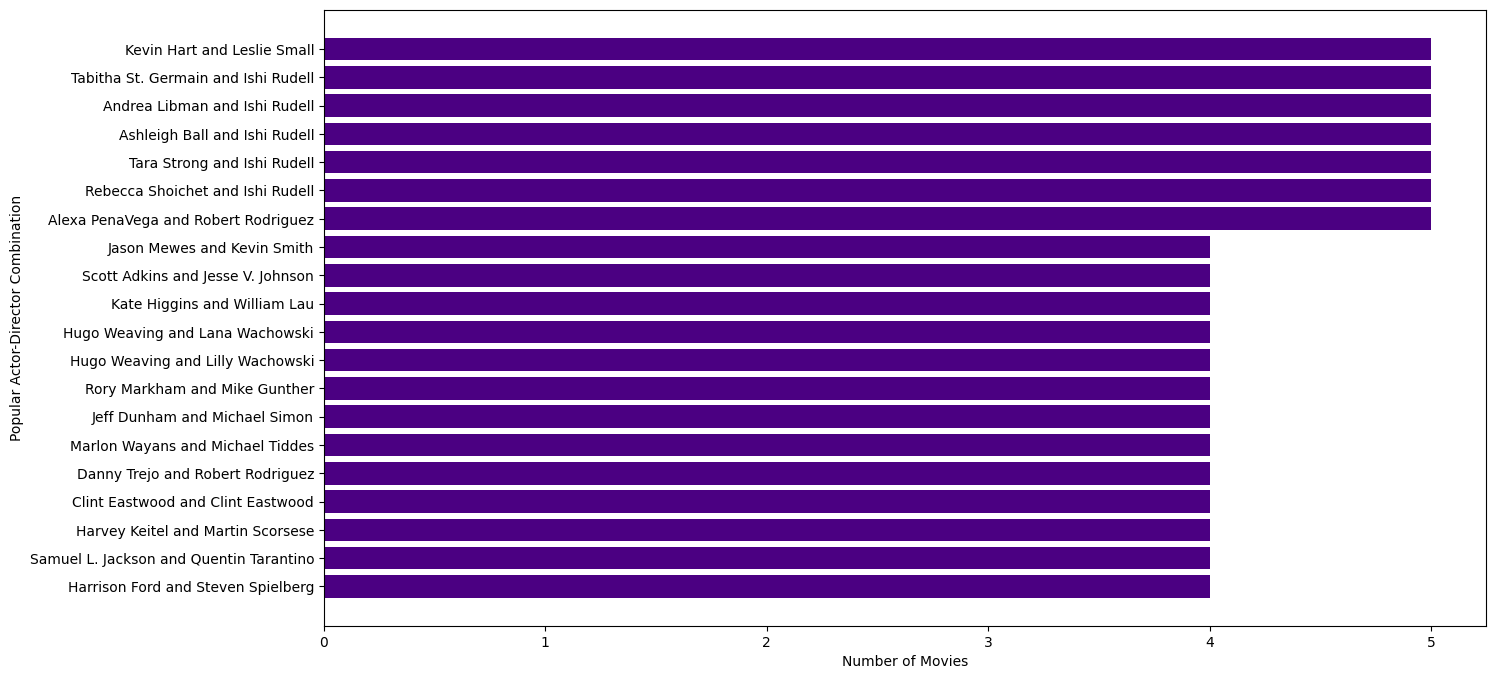

In [ ]:
df_actors_directors=df_usa_movies_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:20]
plt.figure(figsize=(15,8))
plt.barh(df_actors_directors[::-1]['Actor_Director_Combination'], df_actors_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actor-Director Combination')
plt.show()

The Most Popular Actor Director Combination in Movies Across USA are:-

'Smith Foreman and Stanley Moore',
'Marlon Wayans and Michael Tiddes',
'Adam Sandler and Steve Brill',
'Maisie Benson and Stanley Moore',
'Ashleigh Ball and Ishi Rudell',
'Tara Strong and Ishi Rudell',
'Rebecca Shoichet and Ishi Rudell',
'Kerry Gudjohnsen and Alex Woo',
'Kerry Gudjohnsen and Stanley Moore',
'Paul Killam and Alex Woo',
'Paul Killam and Stanley Moore',
'Andrea Libman and Ishi Rudell',
'Kevin Hart and Leslie Small',
'Maisie Benson and Alex Woo',
'Alexa PenaVega and Robert Rodriguez',
'Tabitha St. Germain and Ishi Rudell'

In [ ]:
df_india_shows=df_final1[df_final1['country']=='India'][df_final1[df_final1['country']=='India']['type']=='TV Show']
df_india_movies=df_final1[df_final1['country']=='India'][df_final1[df_final1['country']=='India']['type']=='Movie']

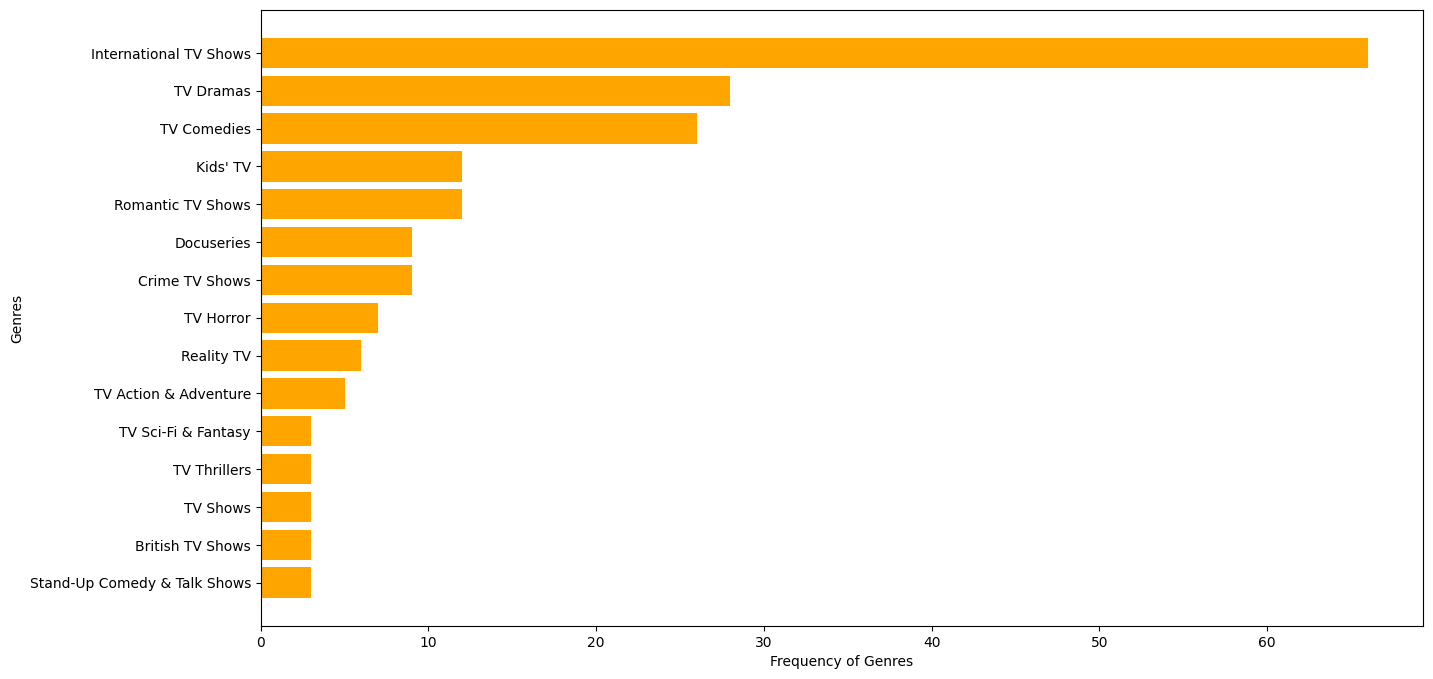

In [ ]:
df_genre=df_india_shows.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

Dramas,Comedy, Kids 'TV Shows and International TV Shows Genres are popular in TV Series in India

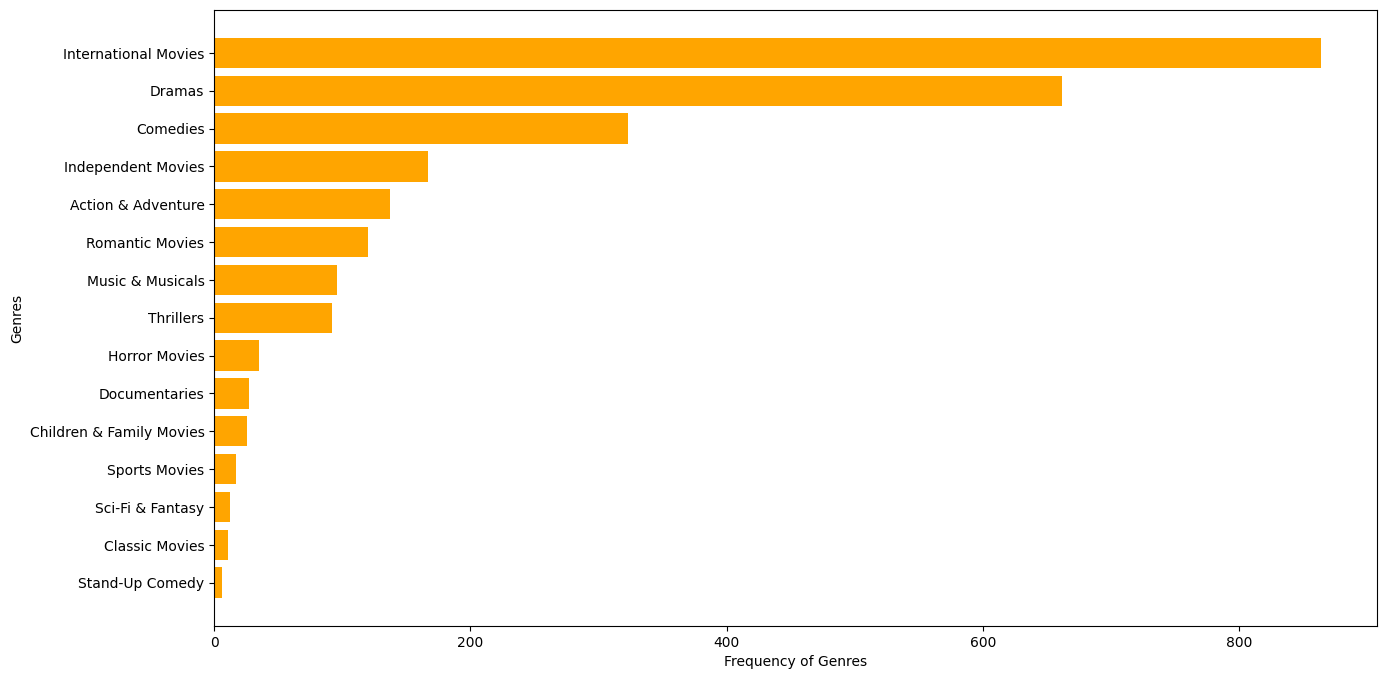

In [ ]:
df_genre=df_india_movies.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

International Movies,Drama,Comedy,Indpeendent Movies and Action, Romance Genres are prevalent in India

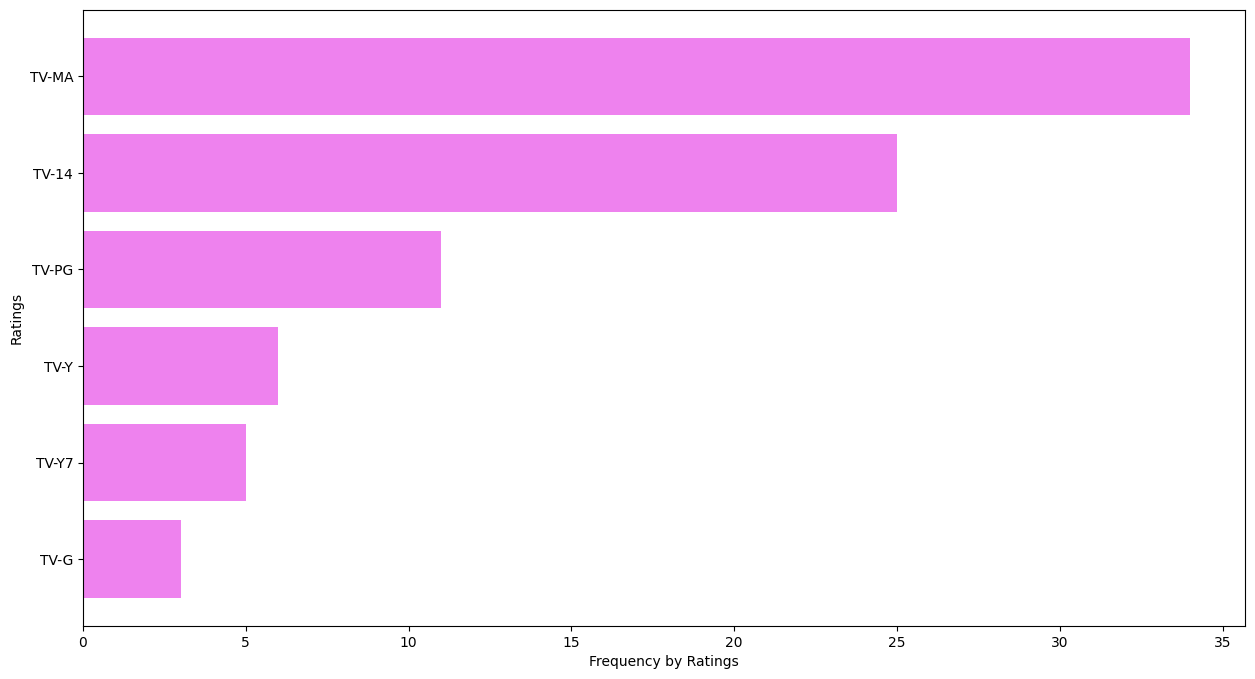

In [ ]:
df_rating=df_india_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

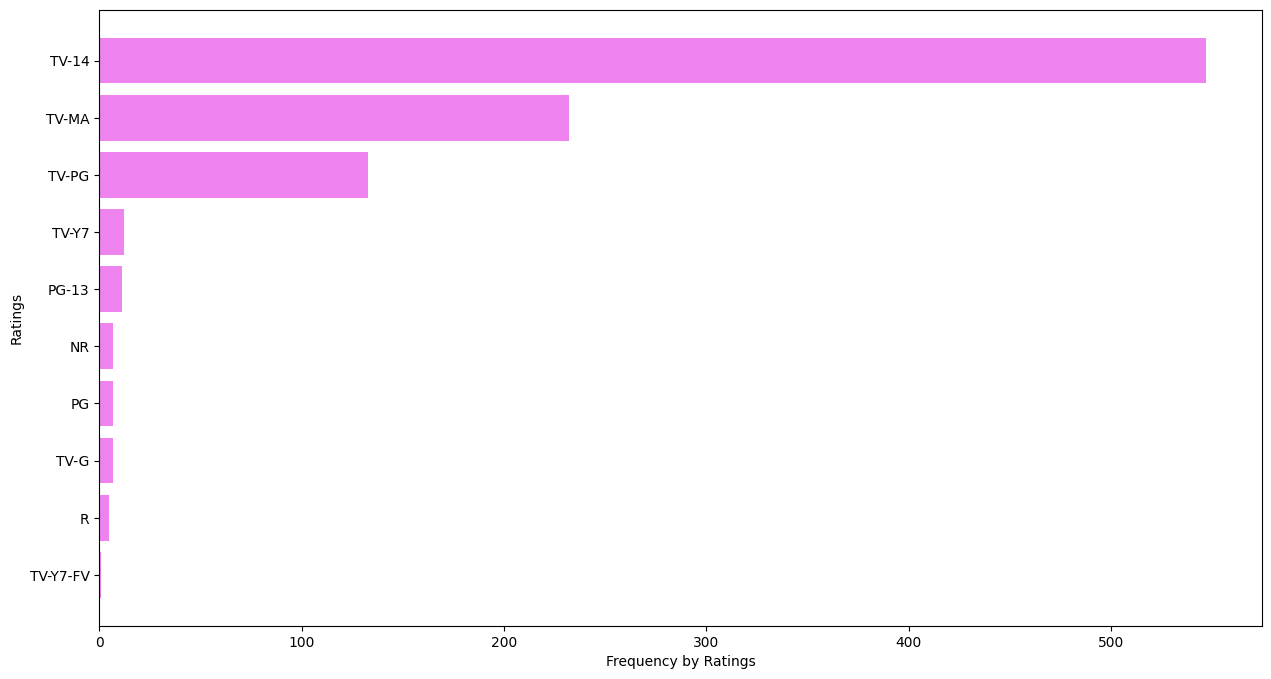

In [ ]:
df_rating=df_india_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

So it seems plaussible to conclude that the popular ratings across Netflix includes Mature Audiences in TV Shows and those appropriate for people over 14 in Movies in India.

Now this indeed seems to be the case. Indian TV Shows in Netflix are without a shadow of doubt intended for Mature Audiences while Movies for over 14 years of age.

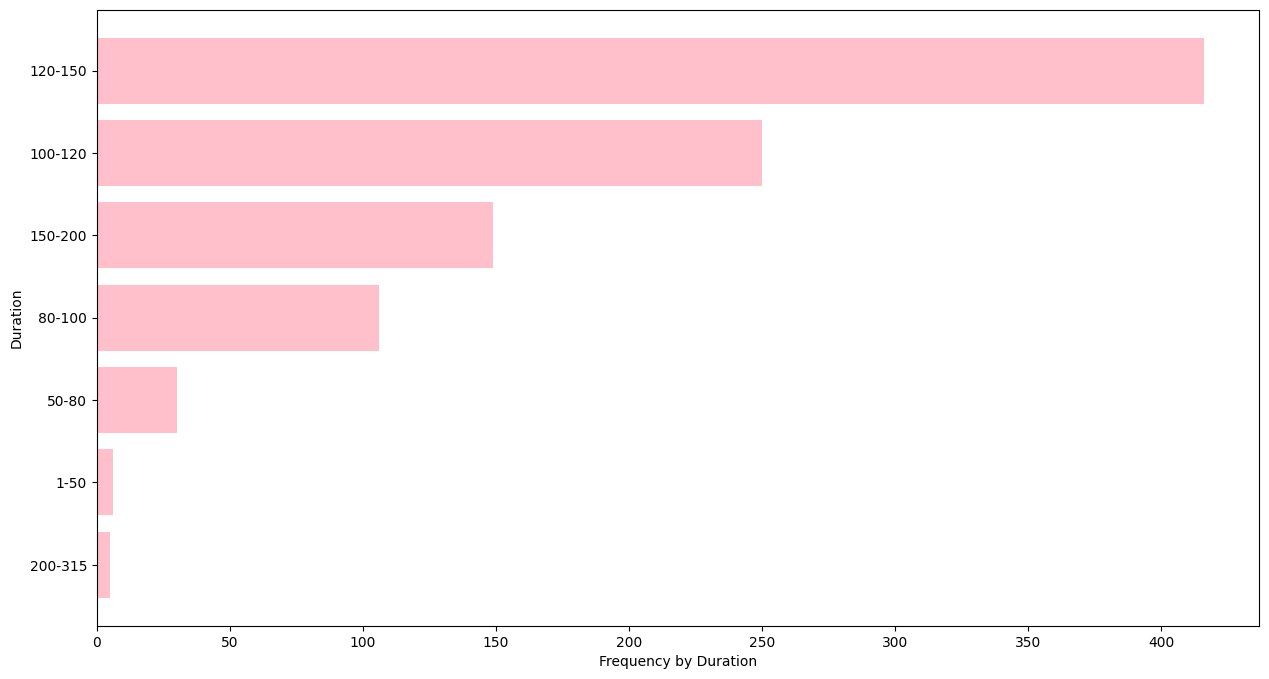

In [ ]:
df_duration=df_india_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

Across movies ranges of minutes in India are comparatively greater than USA with a sweet spot at 120-150 mins.

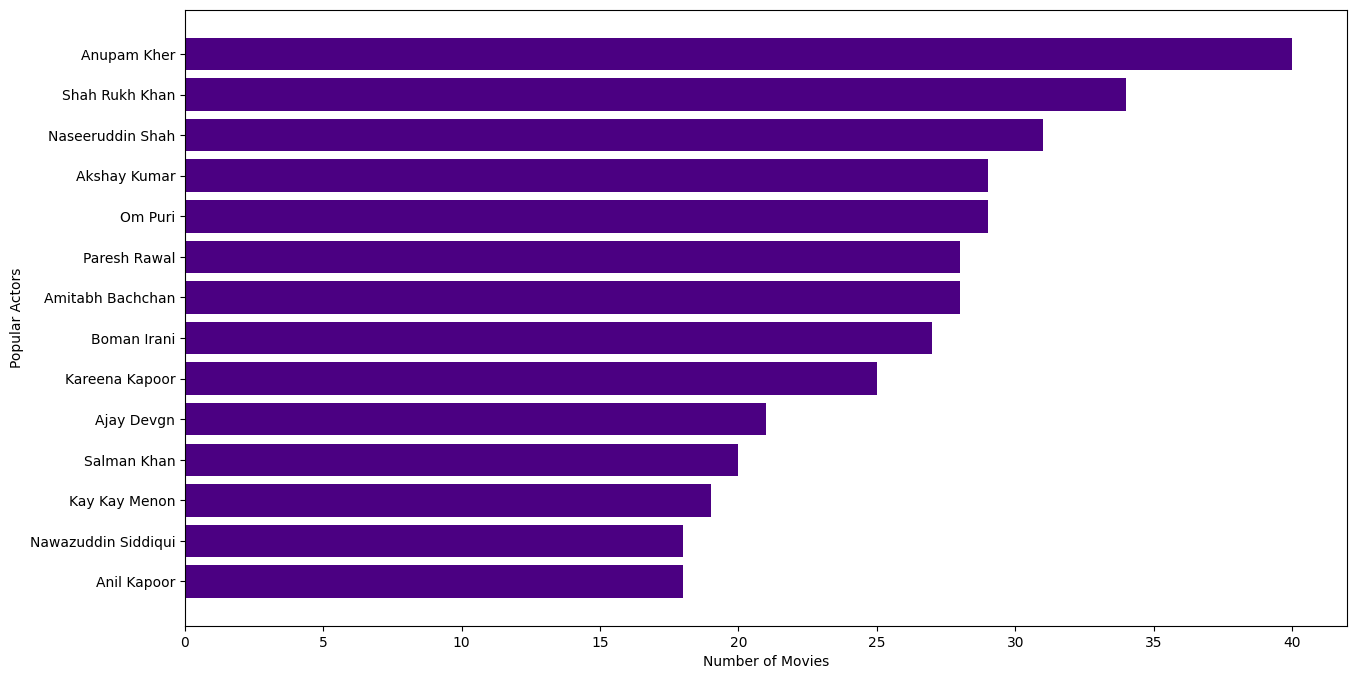

In [ ]:
df_actors=df_india_movies.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_actors=df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

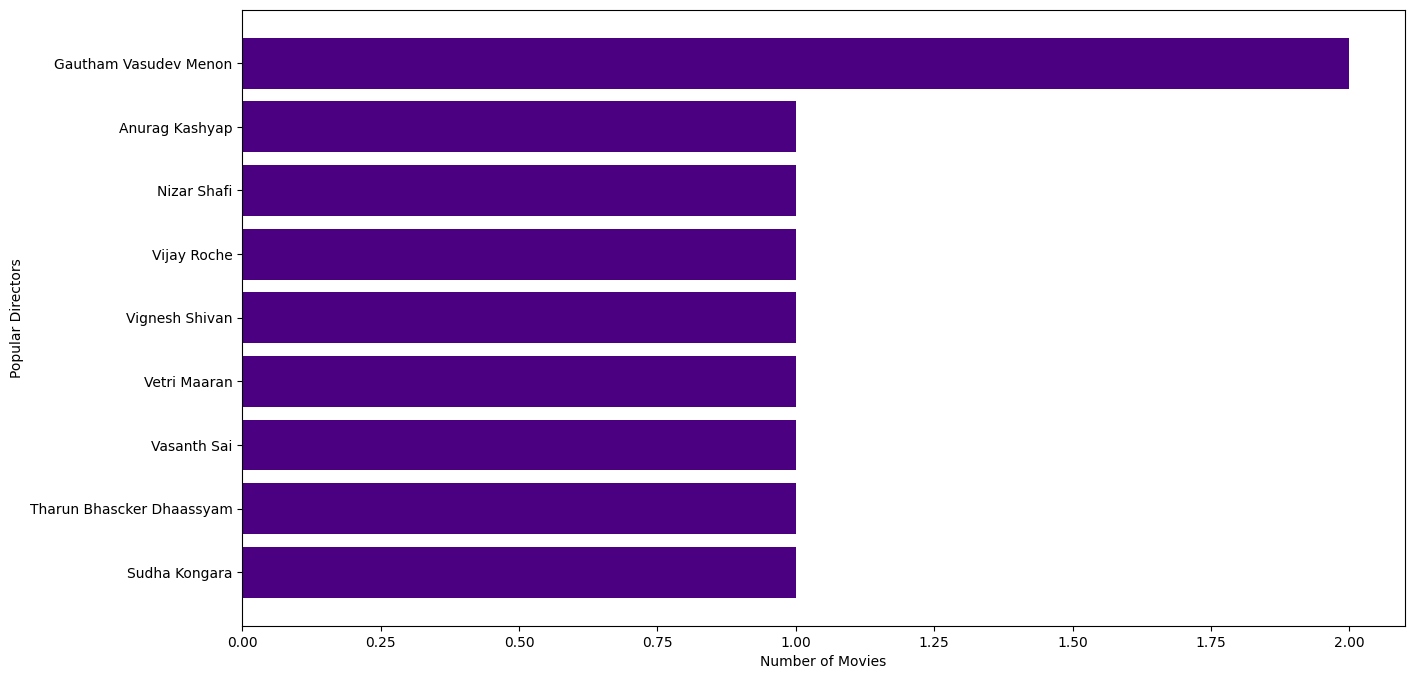

In [ ]:
df_directors=df_india_shows.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_directors=df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

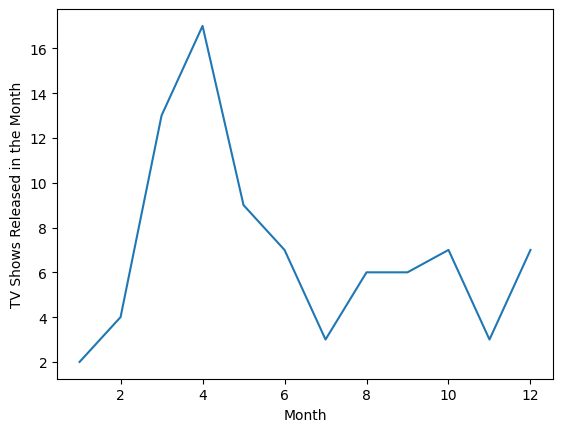

In [ ]:
df_month=df_india_shows.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("TV Shows Released in the Month")
plt.xlabel("Month")
plt.show()

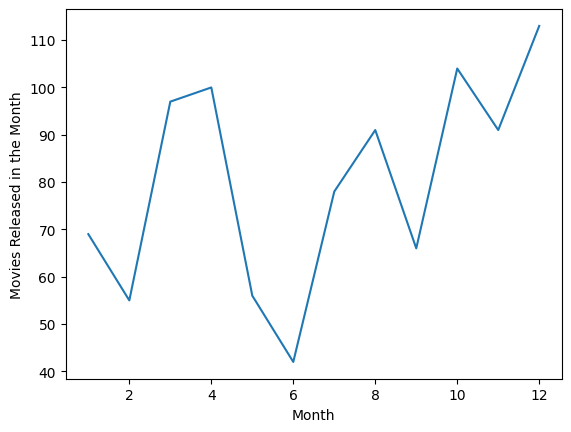

In [ ]:
df_month=df_india_movies.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

TV Shows are added in Netflix by a tremendous amount in April in India

Movies are added in Netflix in India by a tremendous amount in first week/last month of current year and first month of next year

In [ ]:
df_uk_shows=df_final1[df_final1['country']=='United Kingdom'][df_final1[df_final1['country']=='United Kingdom']['type']=='TV Show']
df_uk_movies=df_final1[df_final1['country']=='United Kingdom'][df_final1[df_final1['country']=='United Kingdom']['type']=='Movie']

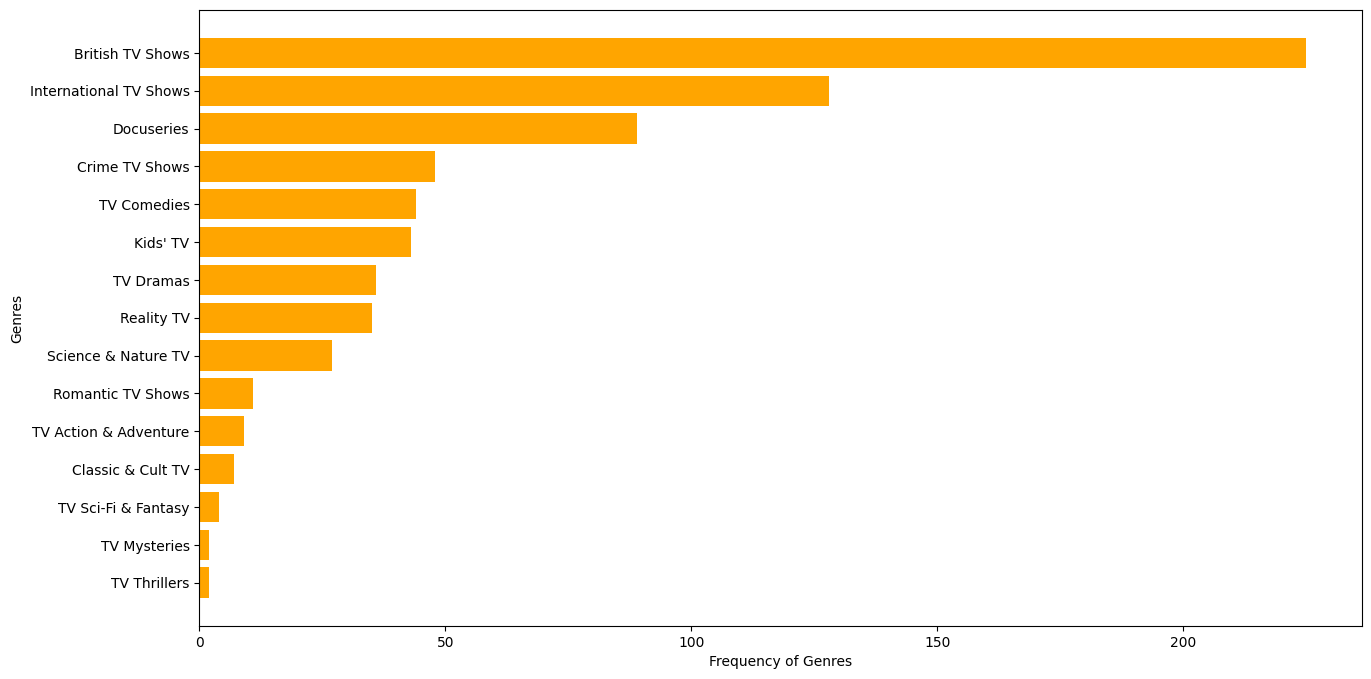

In [ ]:
df_genre=df_uk_shows.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

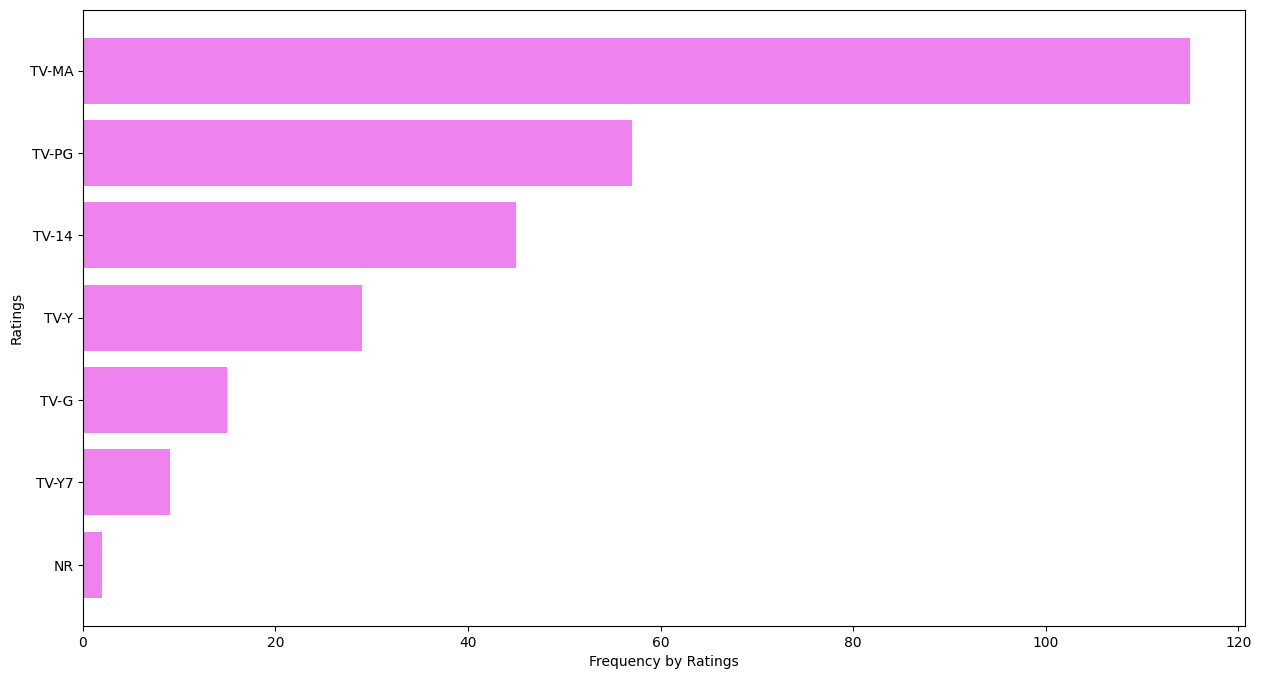

In [ ]:
df_rating=df_uk_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

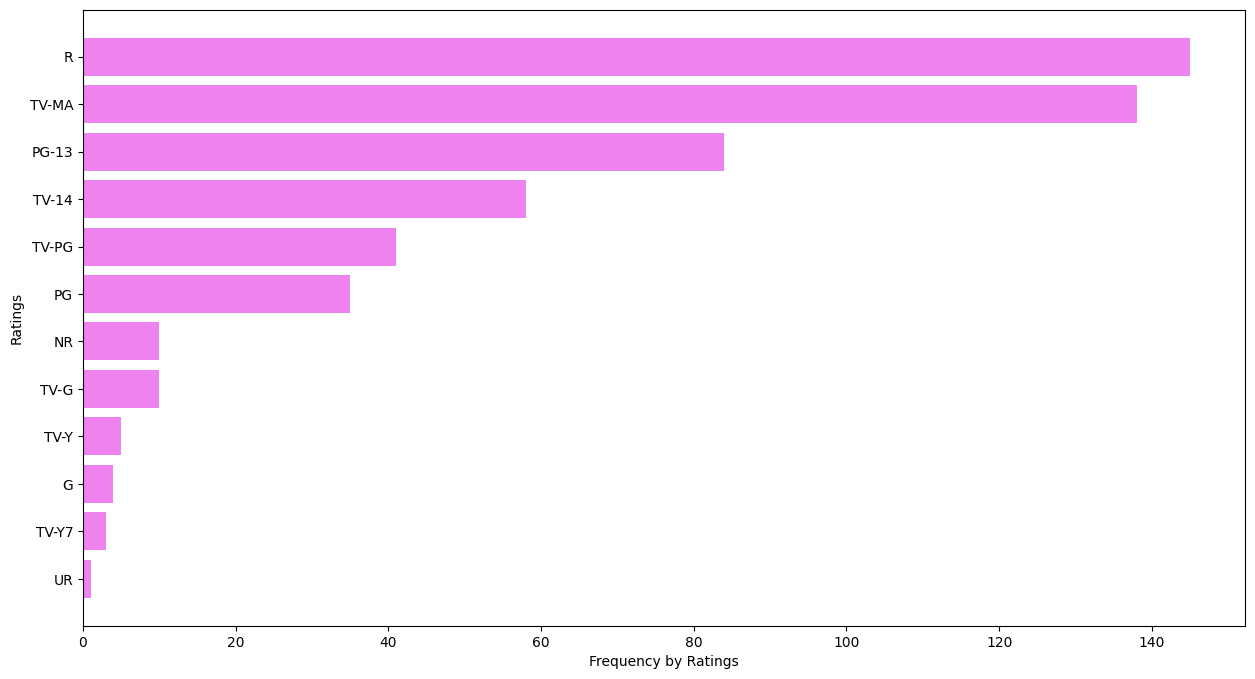

In [ ]:
df_rating=df_uk_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

So it seems plaussible to conclude that the popular ratings across Netflix includes Parental Guidance and Mature Audiences in TV Shows and R Rated+MA Rated in Movies in UK

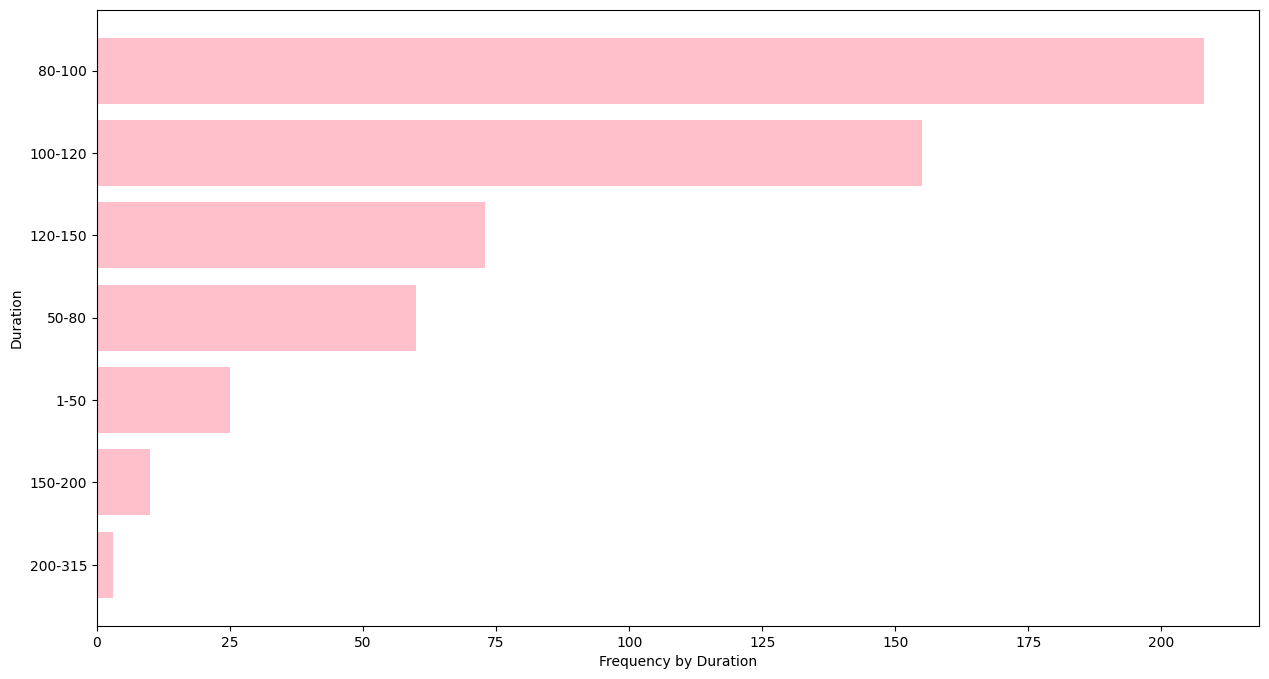

In [ ]:
df_duration=df_uk_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

Across movies ranges of minutes in UK have a sweet spot at 80-120 mins.

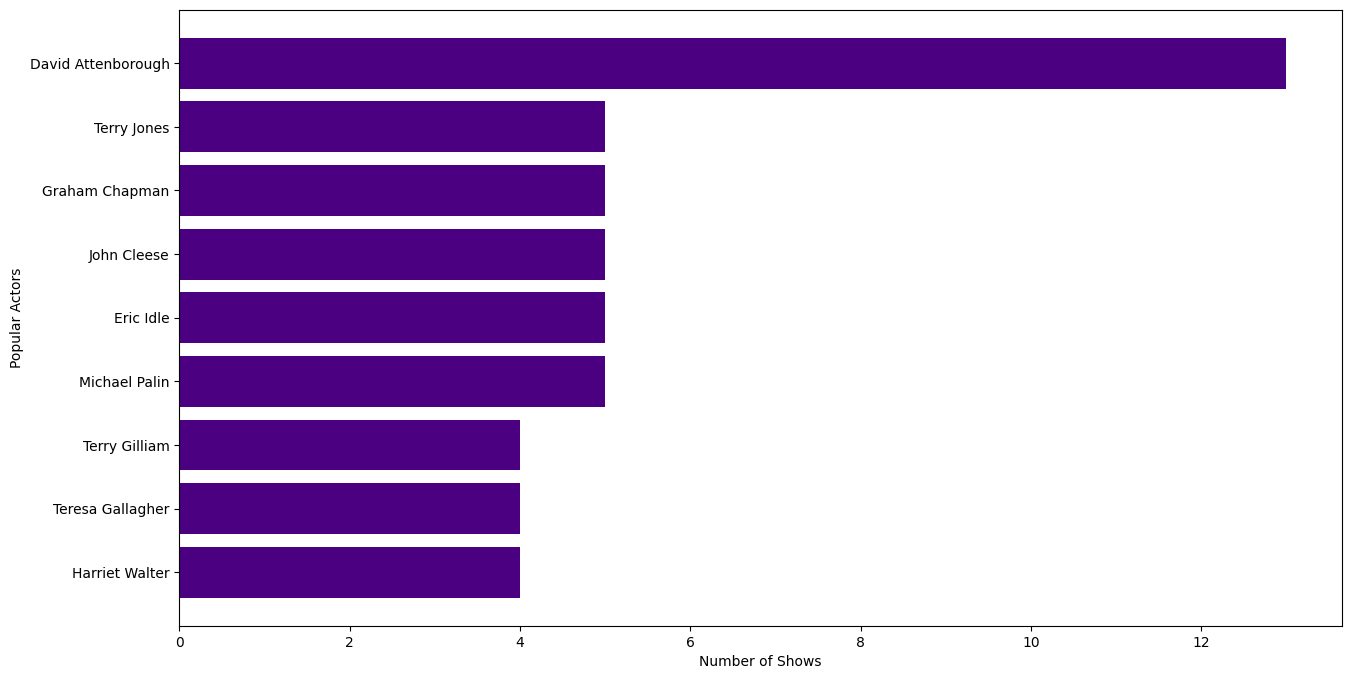

In [ ]:
df_actors=df_uk_shows.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors=df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actors')
plt.show()

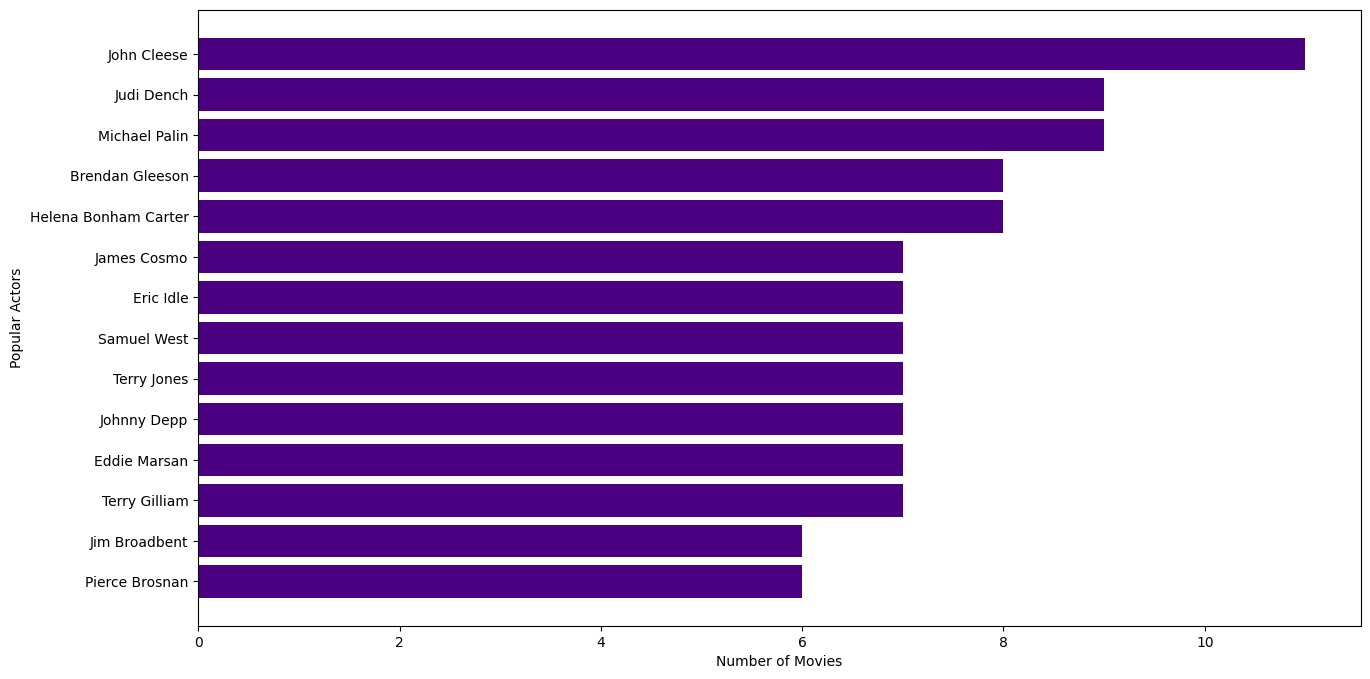

In [ ]:
df_actors=df_uk_movies.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_actors=df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['Actors'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

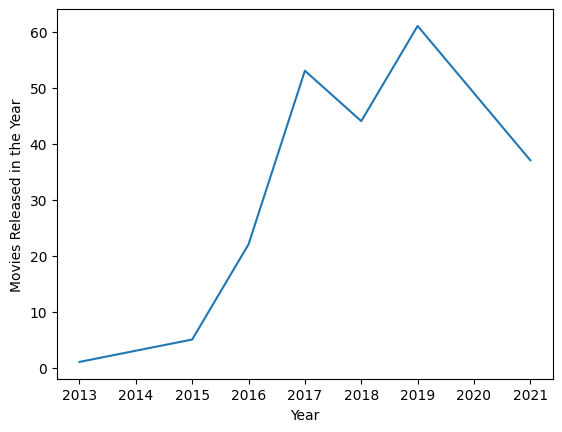

In [ ]:
df_year=df_uk_shows.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

In terms of TV Shows, UK saw a downfall in 2018 from 2017, then a great increase in 2019 but has been reducing since then.

In terms of Movies,the number of popular movies in UK increased till 2019, since then it's decreasing.

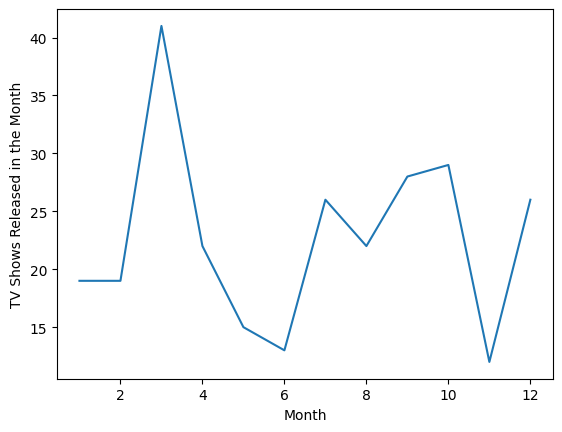

In [ ]:
df_month=df_uk_shows.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("TV Shows Released in the Month")
plt.xlabel("Month")
plt.show()

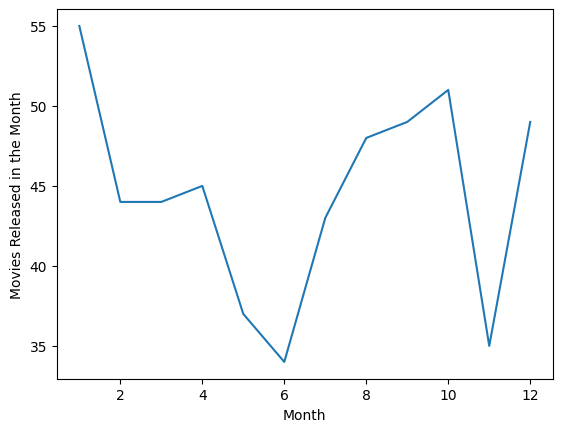

In [ ]:
df_month=df_uk_movies.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

TV Shows are added in Netflix by a tremendous amount in March in UK

Movies are added in Netflix in India by a tremendous amount in first week/last month of current year and first month of next year

In [ ]:
df_japan_shows=df_final1[df_final1['country']=='Japan'][df_final1[df_final1['country']=='Japan']['type']=='TV Show']

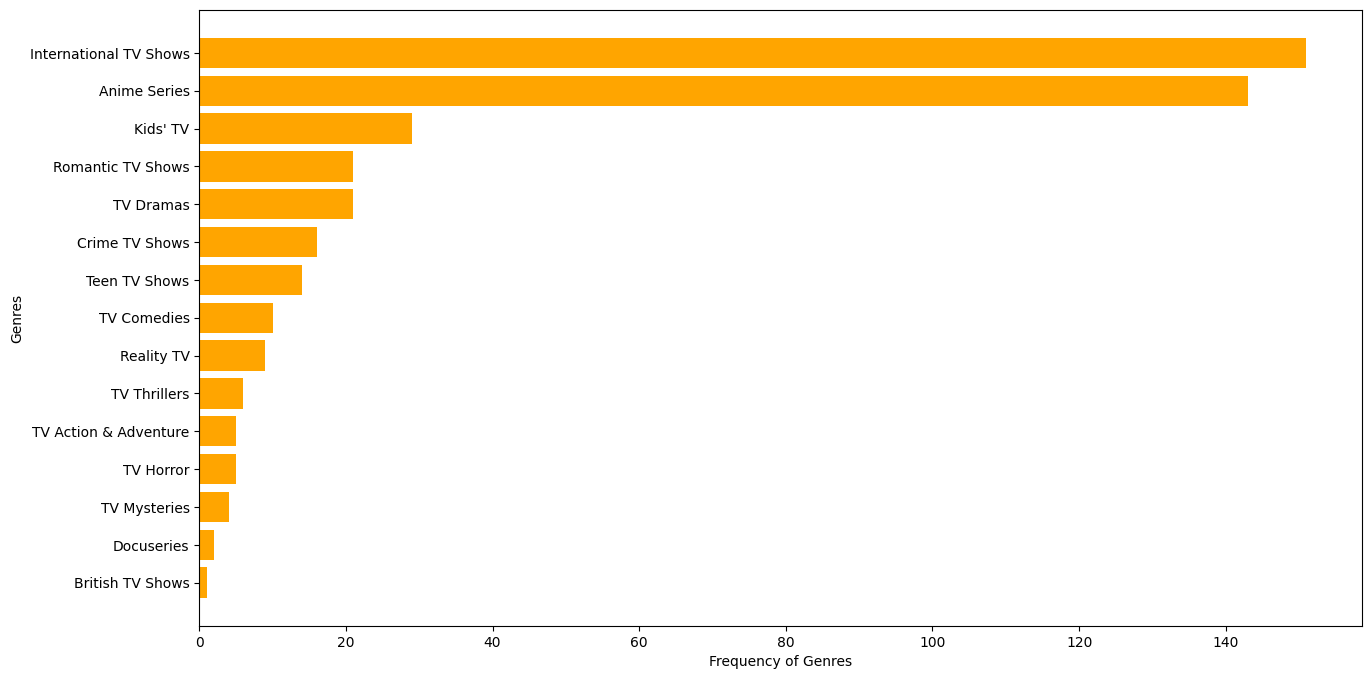

In [ ]:
df_genre=df_japan_shows.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

International TV Shows and Anime Genres are popular in TV Shows in Japan

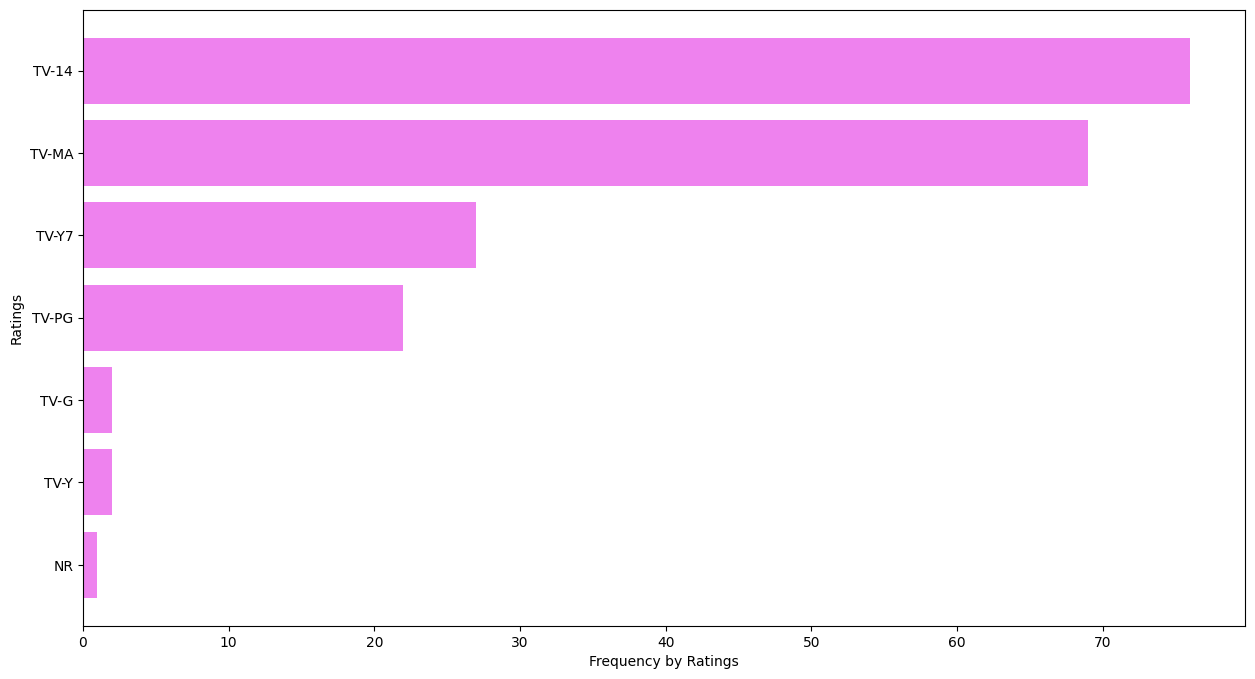

In [ ]:
df_rating=df_japan_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

So it seems plaussible to conclude that the popular ratings across Netflix includes TV-14 Mature Audiences in TV Shows

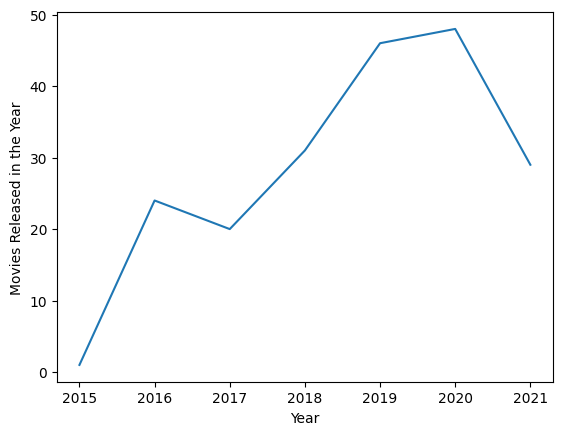

In [ ]:
df_year=df_japan_shows.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

In Japan, TV Shows have diminished in 2017 from 2016 and then increased till 2020 after which it has reduced in 2021.

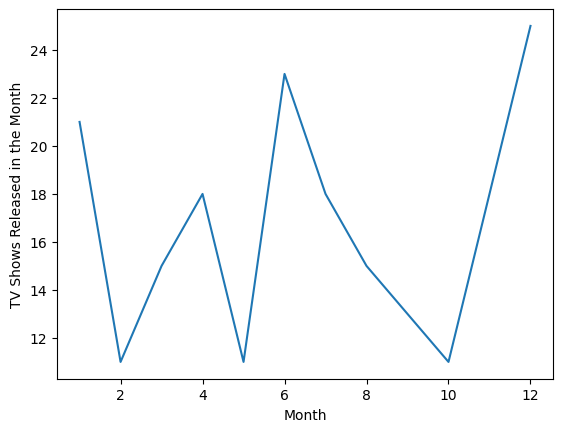

In [ ]:
df_month=df_japan_shows.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("TV Shows Released in the Month")
plt.xlabel("Month")
plt.show()

TV Shows are added in Netflix by significant numbers in April and January in Japan

Recommendations

1) The most popular Genres across the countries and in both TV Shows and Movies are Drama, Comedy and International TV Shows/Movies, so content aligning to that is recommended.

2)Add TV Shows in July/August and Movies in last week of the year/first month of the next year.

3)For USA audience 80-120 mins is the recommended length for movies and Kids TV Shows are also popular along with the genres in first point, hence recommended.

4)For UK audience, recommended length for movies is same as that of USA (80-120 mins)

5)The target audience in USA and India is recommended to be 14+ and above ratings while for UK, its recommended to be completely Mature/R content .

6)Add movies for Indian Audience, it has been declining since 2018.

7) While creating content, take into consideration the popular actors/directors for that country. Also take into account the director-actor combination which is highly recommended.